<a id="2"></a>
<h1 style="background-color:pink;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Welcome to our Graduation Project</h1>

<a id="1.2"></a>
<h3 style="background-color:pink;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Dataset Overview</h3>

The **Framingham Heart Study** is considering a turning point in identifying the **risk factors of heart disease**, and is one of the most important epidemiological studies conducted.

A lot of our present understanding of cardiovascular disease can be attributed to this study.

To better understand heart disease and the measures that could be taken to combat it, the Framingham Heart Study (FHS) was established in the late 1940's.

It was a **joint project of Boston University and the National Heart, Lung, and Blood Institute (NHLBI)**.

The **aim** of the study was to to **better understand cardiovascular disease by enrolling people free of the disease, and see who** 

**developed the disease in the next 10 years.**

|         Column       |                             Description                            |
|:-------------------:|:---------------------------------------------------------------:|
|         Gender        |                Male or female (Nominal)                            |
|         Age         |                Age of the patient (Continuous)                      |
|   Current Smoker    |     Whether or not the patient is a current smoker (Nominal)      |
|    Cigs Per Day     |     The number of cigarettes that the person smoked on average in one day (Continuous) |
|      BP Meds        |     Whether or not the patient was on blood pressure medication (Nominal) |
|  Prevalent Stroke   |     Whether or not the patient had previously had a stroke (Nominal) |
|   Prevalent Hyp     |     Whether or not the patient was hypertensive (Nominal)          |
|      Diabetes       |     Whether or not the patient had diabetes (Nominal)               |
|      Tot Chol       |     Total cholesterol level (Continuous)                            |
|       Sys BP        |     Systolic blood pressure (Continuous)                            |
|       Dia BP        |     Diastolic blood pressure (Continuous)                           |
|         BMI         |     Body Mass Index (Continuous)                                    |
|     Heart Rate      |     Heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of the large number of possible values) |
|       Glucose       |     Glucose level (Continuous)                                      |
|10-year risk of coronary heart disease CHD| Binary variable indicating whether the patient has a 10-year risk of coronary heart disease (CHD) (Binary: "1" means "Yes", "0" means "No") |

<a id="2.1"></a>
<h3 style="background-color:pink;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Libraries & loading the data</h3>

In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

In [5]:
df = pd.read_csv("Data/data.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<a id="2"></a>
<h1 style="background-color:pink;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Exploratory Data Analysis</h1>

In [6]:
print(f"There are {df.shape[0]} Rows and {df.shape[1]} Columns")

There are 4238 Rows and 16 Columns


In [7]:
print(f"Number of duplicates {df.duplicated().sum()}")

Number of duplicates 0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [10]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [11]:
round(df.describe(include='all'),2)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.00,4238.00,4133.00,4238.00,4209.00,4185.00,4238.00,4238.00,4238.00,4188.00,4238.00,4238.00,4219.00,4237.00,3850.00,4238.00
mean,0.43,49.58,1.98,0.49,9.00,0.03,0.01,0.31,0.03,236.72,132.35,82.89,25.80,75.88,81.97,0.15
std,0.50,8.57,1.02,0.50,11.92,0.17,0.08,0.46,0.16,44.59,22.04,11.91,4.08,12.03,23.96,0.36
min,0.00,32.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,107.00,83.50,48.00,15.54,44.00,40.00,0.00
25%,0.00,42.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,206.00,117.00,75.00,23.07,68.00,71.00,0.00
50%,0.00,49.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,234.00,128.00,82.00,25.40,75.00,78.00,0.00
75%,1.00,56.00,3.00,1.00,20.00,0.00,0.00,1.00,0.00,263.00,144.00,89.88,28.04,83.00,87.00,0.00
max,1.00,70.00,4.00,1.00,70.00,1.00,1.00,1.00,1.00,696.00,295.00,142.50,56.80,143.00,394.00,1.00


### Visualization of Nullity of the Dataset

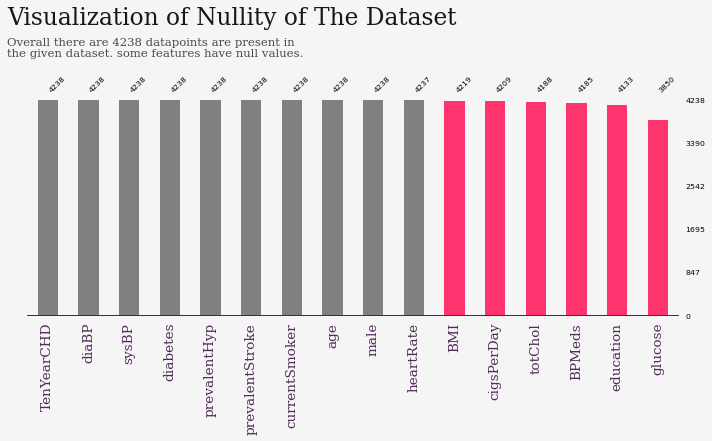

In [12]:
import missingno as msno

color = ['grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','#fe346e','#fe346e', '#fe346e', '#fe346e', '#fe346e', '#fe346e']
fig, ax = plt.subplots(figsize = (12,4), dpi = 70)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

msno.bar(df, sort = 'descending', 
         color = color, 
         ax = ax, fontsize =8,
         labels = 'off', filter = 'top')

ax.text(-1,1.35,'Visualization of Nullity of The Dataset',{'font': 'serif', 'size': 24,  'color':'black'},alpha = 0.9)
ax.text(-1,1.2,'Overall there are 4238 datapoints are present in \nthe given dataset. some features have null values.',{'font': 'serif', 'size': 12,  'color':'black'}, alpha = 0.7)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, 
                   ha = 'center', **{'font': 'serif', 'size': 14,'weight':'normal','color':'#512b58'}, alpha = 1)
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)

plt.show()

**How can we deal with blanks in our data?**

There are many ways. One can simply drop these records, fill the blanks with the mean, the median, or even simply the record before or after the missing value.

But there are other, more unusual ways. 

Here We will use a **Decision Tree to predict the missing BMI**

Other interesting methods to explore could include using K-Nearest-Neighbours to fill the gaps.

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

DT_BMI_pipe = Pipeline(steps=[ 
                               ('scale', StandardScaler()),
                               ('lr', DecisionTreeRegressor(random_state=42))
                              ])

X = df[['age', 'male', 'BMI']].copy()

Missing = X[X.BMI.isna()]
X = X[~X.BMI.isna()]
Y = X.pop('BMI')

DT_BMI_pipe.fit(X, Y)
predicted_BMI = pd.Series(DT_BMI_pipe.predict(Missing[['age', 'male']]), index=Missing.index)

df.loc[Missing.index, 'BMI'] = predicted_BMI

In [14]:
df.isnull().sum()


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                  0
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Now we imputed the null values for the BMI feature, we will consider later the missing values for the other features

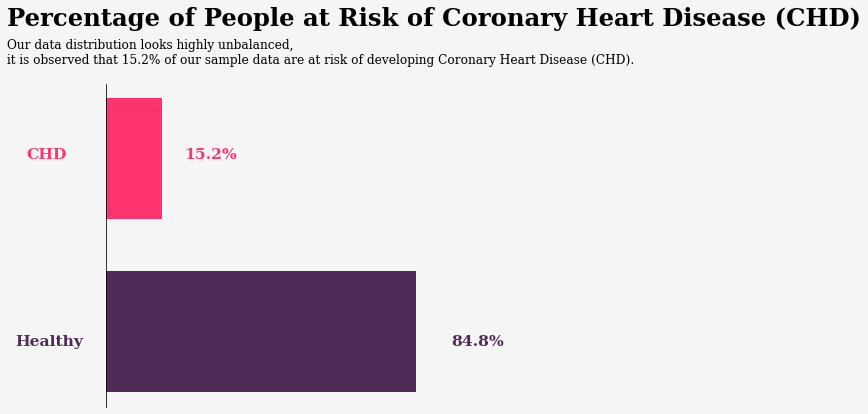

In [15]:
# let us overview the distribution of the target of our data
x = pd.DataFrame(df.groupby(['TenYearCHD'])['TenYearCHD'].count())

# Plot
fig, ax = plt.subplots(figsize=(6, 6), dpi=70)
ax.barh([1], x.TenYearCHD[1], height=0.7, color='#fe346e')
plt.text(-1050, -0.08, 'Healthy', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'style': 'normal', 'color': '#512b58'})
plt.text(4000, -0.08, '84.8%', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': '#512b58'})
ax.barh([0], x.TenYearCHD[0], height=0.7, color='#512b58')
plt.text(-930, 1, 'CHD', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'style': 'normal', 'color': '#fe346e'})
plt.text(900, 1, '15.2%', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': '#fe346e'})

fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

plt.text(-1150, 1.77, 'Percentage of People at Risk of Coronary Heart Disease (CHD)', {'font': 'Serif', 'size': '25', 'weight': 'bold', 'color': 'black'})
plt.text(-1150, 1.55, 'Our data distribution looks highly unbalanced,\nit is observed that 15.2% of our sample data are at risk of developing Coronary Heart Disease (CHD).',
         {'font': 'Serif', 'size': '12.5', 'color': 'black'})

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

<a id="2.1"></a>
<h3 style="background-color:pink;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Univariate analysis of continuous variables</h3>

Since we will explore a variety of features, it is a good practice to automate the process by defining a **custom function.**
Our function will visualize

**1. the distrubtion of the feature**

**2. Box plot of the feature for healthy and CHD cases**

In [14]:
# function to automate our features distrubtion exploring process
df['TenYearCHD_statue'] = df['TenYearCHD'].map({1: 'CHD', 0: 'Healthy'})
def plot_distribution(df, feature, plot_title):
    box_plots_colors = {'Healthy': '#512b58', 'CHD':'#fe346e'}
    
    with plt.style.context('fivethirtyeight'):
        fig, ax = plt.subplots(1,2, figsize=(20,5))

        sns.histplot(x=feature,
                     data=df, 
                     ax=ax[0],
                     linewidth=0.8,
                     color='#512b58',
                     bins=20).set_title(f"Distribution of {plot_title}")
        ax[0].set_xlabel(plot_title)

        sns.boxplot(x=feature,
                    data=df,
                    y="TenYearCHD_statue",
                    linewidth=1.5,
                    palette=box_plots_colors,
                    ax=ax[1]).set_title(f"Distribution of {plot_title} by CHD")
        ax[1].set_xlabel(plot_title)
        ax[1].set_ylabel('10 years CHD Status')

        plt.show()

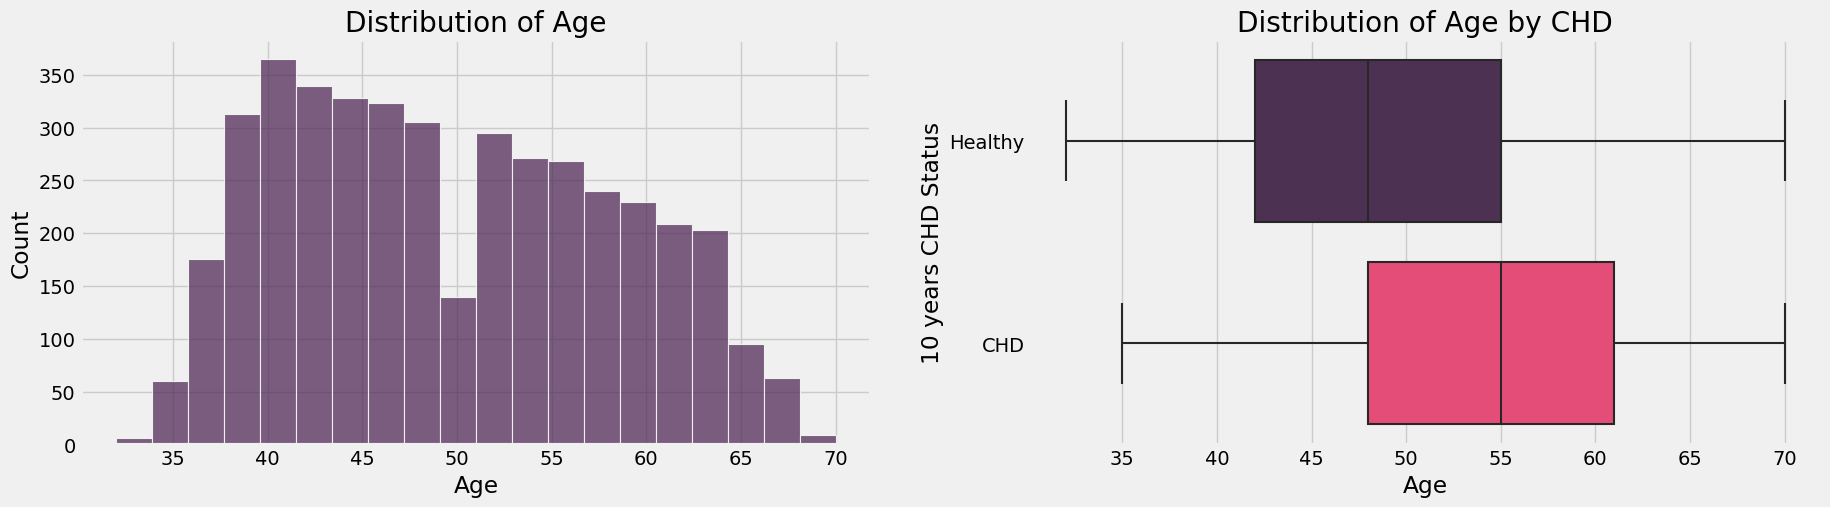

In [22]:
plot_distribution(df, "age", "Age")

C:\Users\Sherif\AppData\Local\Temp\ipykernel_20088\4247406272.py:16: RuntimeWarning: invalid value encountered in scalar divide
  rate.append(df[df['age'] < i]['TenYearCHD'].sum() / len(df[df['age'] < i]['TenYearCHD']))


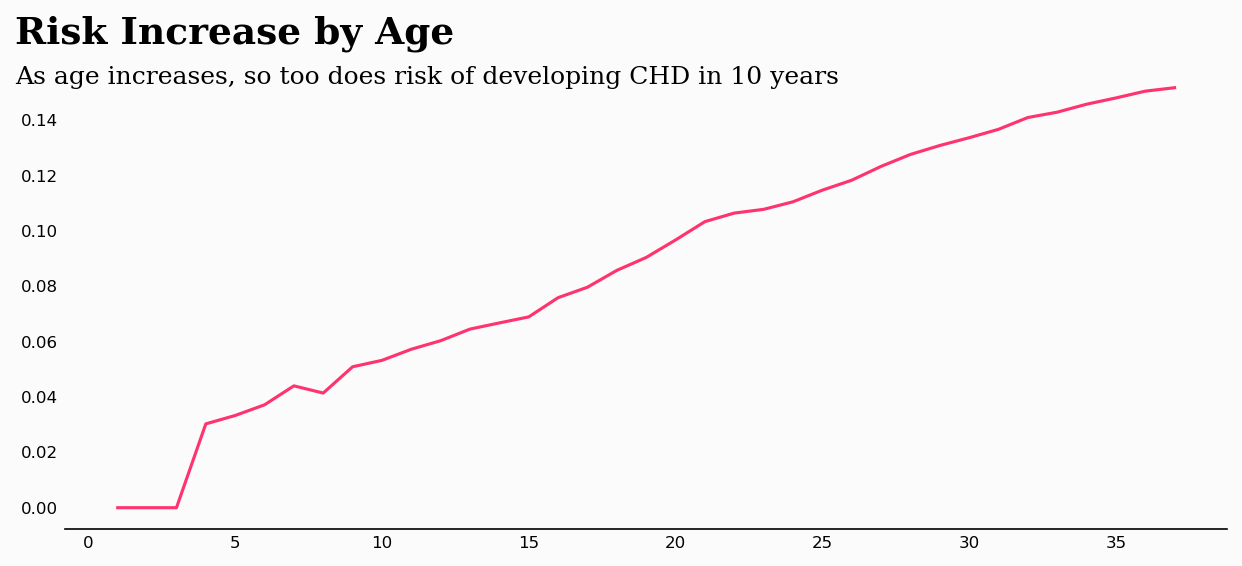

In [16]:
background_color = "#fbfbfb"  
# Create the figure and the grid
fig = plt.figure(figsize=(10, 10), dpi=150, facecolor=background_color)
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.11, hspace=0.5)

ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)

# Ensure 'age' is int
df['age'] = df['age'].astype(int)

# Calculate the CHD rate by age
rate = []
for i in range(df['age'].min(), df['age'].max()):
    rate.append(df[df['age'] < i]['TenYearCHD'].sum() / len(df[df['age'] < i]['TenYearCHD']))

# Plot the rate
sns.lineplot(data=rate, color='#fe346e', ax=ax0)  # Line color changed here

# Remove spines
for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)

# Adjust tick parameters
ax0.tick_params(axis='both', which='major', labelsize=8)
ax0.tick_params(axis=u'both', which=u'both', length=0)

# Add text
ax0.text(-2.5, 0.168, 'Risk Increase by Age', fontsize=18, fontfamily='serif', fontweight='bold')
ax0.text(-2.5, 0.153, 'As age increases, so too does risk of developing CHD in 10 years', fontsize=12, fontfamily='serif')

plt.show()

In [17]:
plot_distribution(df, "glucose", "Glucose")

NameError: name 'plot_distribution' is not defined

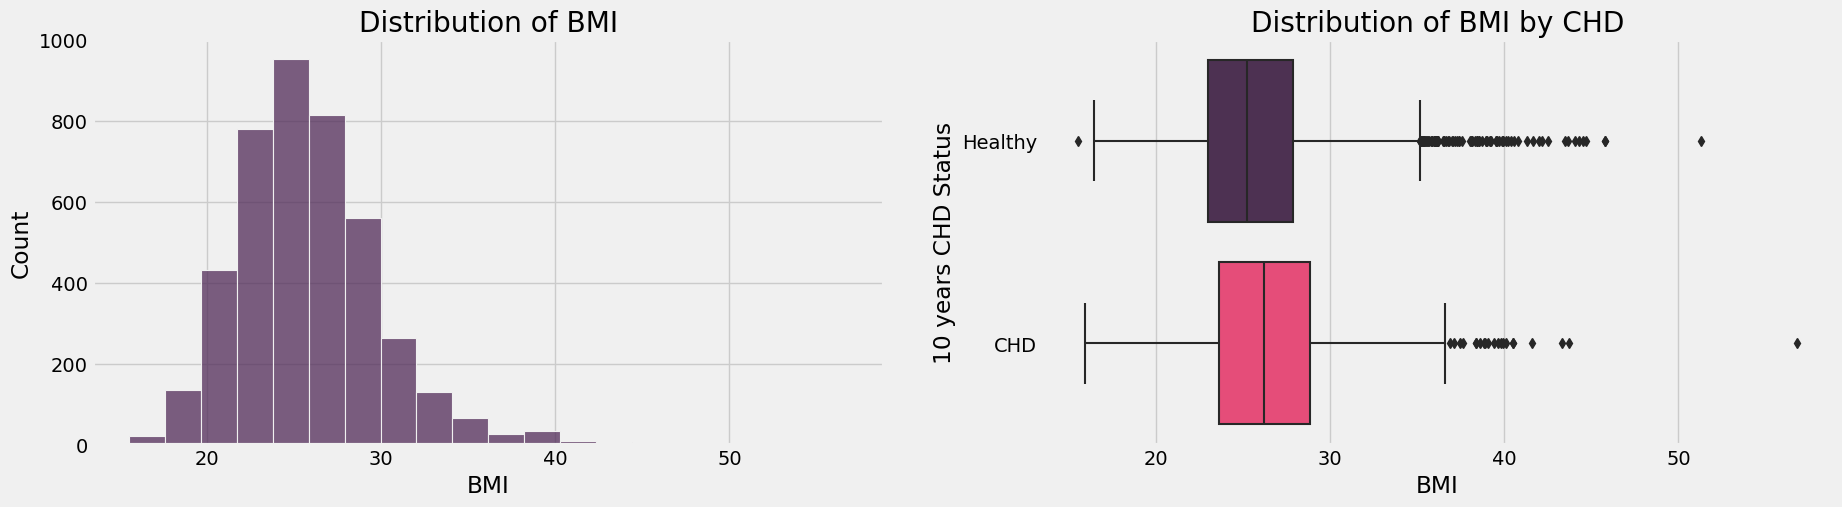

In [24]:
plot_distribution(df, "BMI", "BMI")

C:\Users\Sherif\AppData\Local\Temp\ipykernel_20088\705624759.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='#fe346e', shade=True, linewidth=1.5, ec='black', alpha=0.9, zorder=3, legend=False)
C:\Users\Sherif\AppData\Local\Temp\ipykernel_20088\705624759.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ns[feature], ax=locals()["ax"+str(plot)], color='#512b58', shade=True, linewidth=1.5, ec='black', alpha=0.9, zorder=3, legend=False)
C:\Users\Sherif\AppData\Local\Temp\ipykernel_20088\705624759.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(s[feature], ax=locals

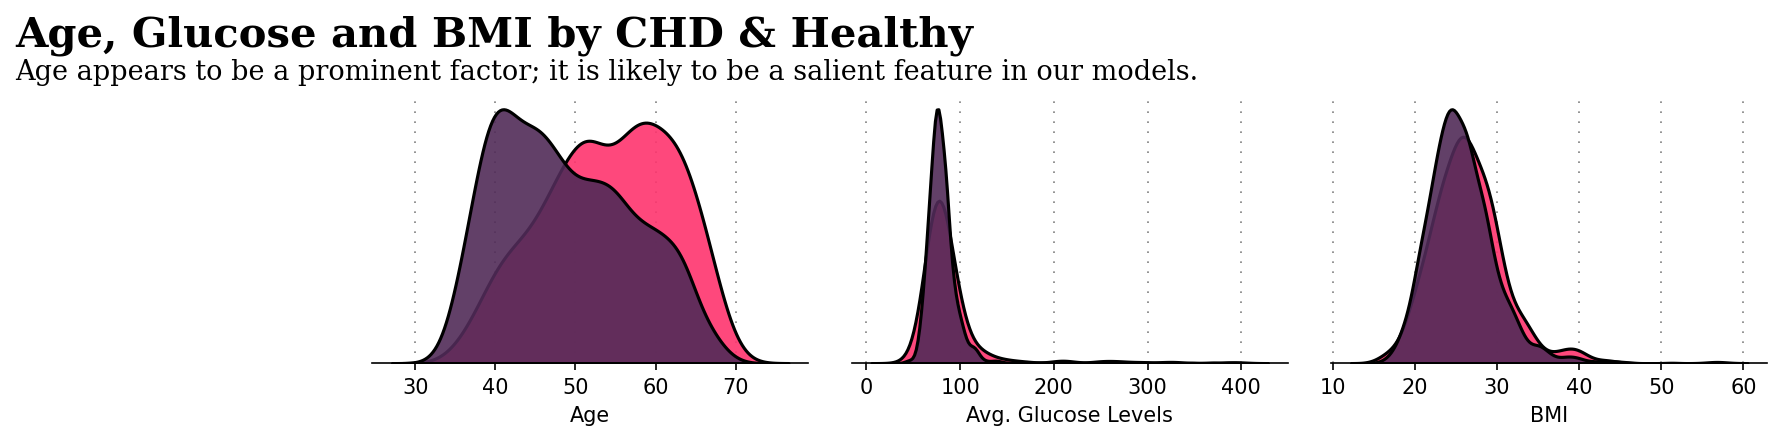

In [18]:
fig = plt.figure(figsize=(12, 12), dpi=150, facecolor='white')
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)

plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor('white')
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top", "right", "left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0

s = df[df['TenYearCHD'] == 1]
ns = df[df['TenYearCHD'] == 0]

for feature in ['age', 'glucose', 'BMI']:
    sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='#fe346e', shade=True, linewidth=1.5, ec='black', alpha=0.9, zorder=3, legend=False)
    sns.kdeplot(ns[feature], ax=locals()["ax"+str(plot)], color='#512b58', shade=True, linewidth=1.5, ec='black', alpha=0.9, zorder=3, legend=False)
    locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1, 5))
    plot += 1

ax0.set_xlabel('Age')
ax1.set_xlabel('Avg. Glucose Levels')
ax2.set_xlabel('BMI')

ax0.text(-20, 0.056, 'Age, Glucose and BMI by CHD & Healthy', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-20, 0.05, 'Age appears to be a prominent factor; it is likely to be a salient feature in our models.',
         fontsize=13, fontweight='light', fontfamily='serif')

plt.show()

In [19]:
plot_distribution(df, "totChol", "Total cholesterol")

NameError: name 'plot_distribution' is not defined

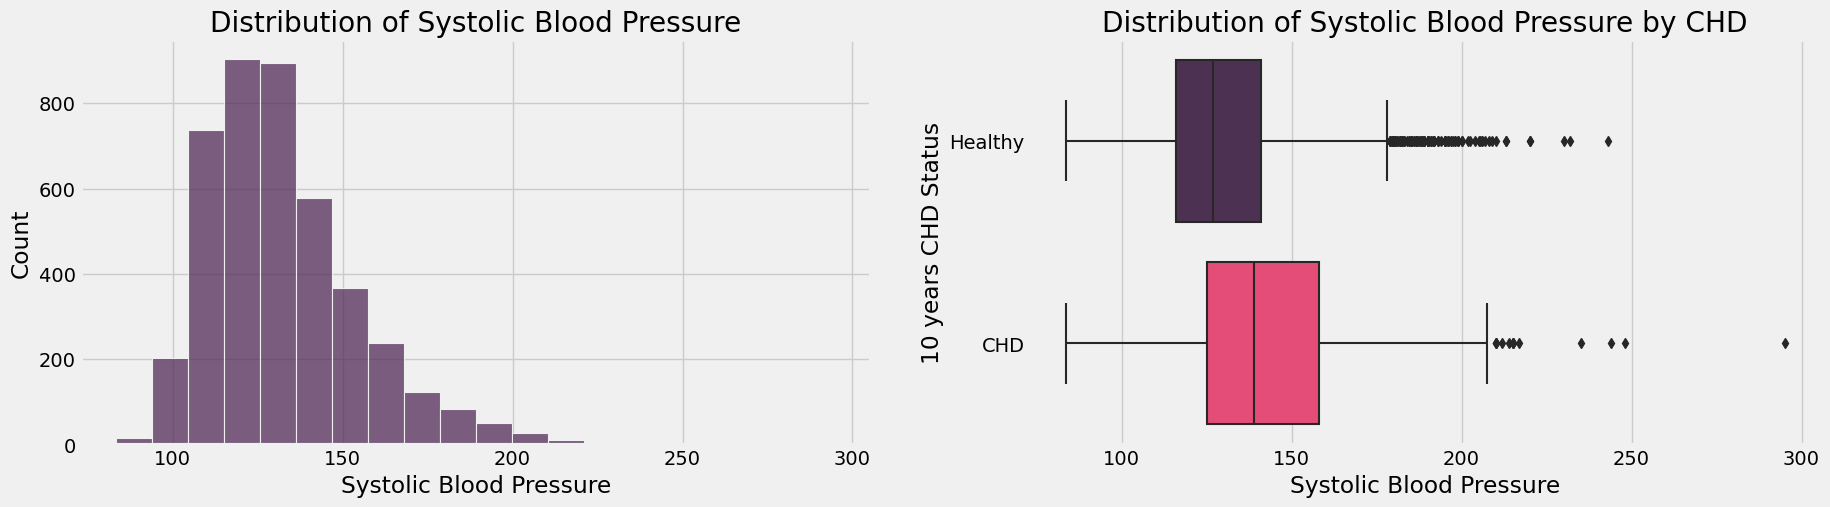

In [36]:
plot_distribution(df, "sysBP", "Systolic Blood Pressure")

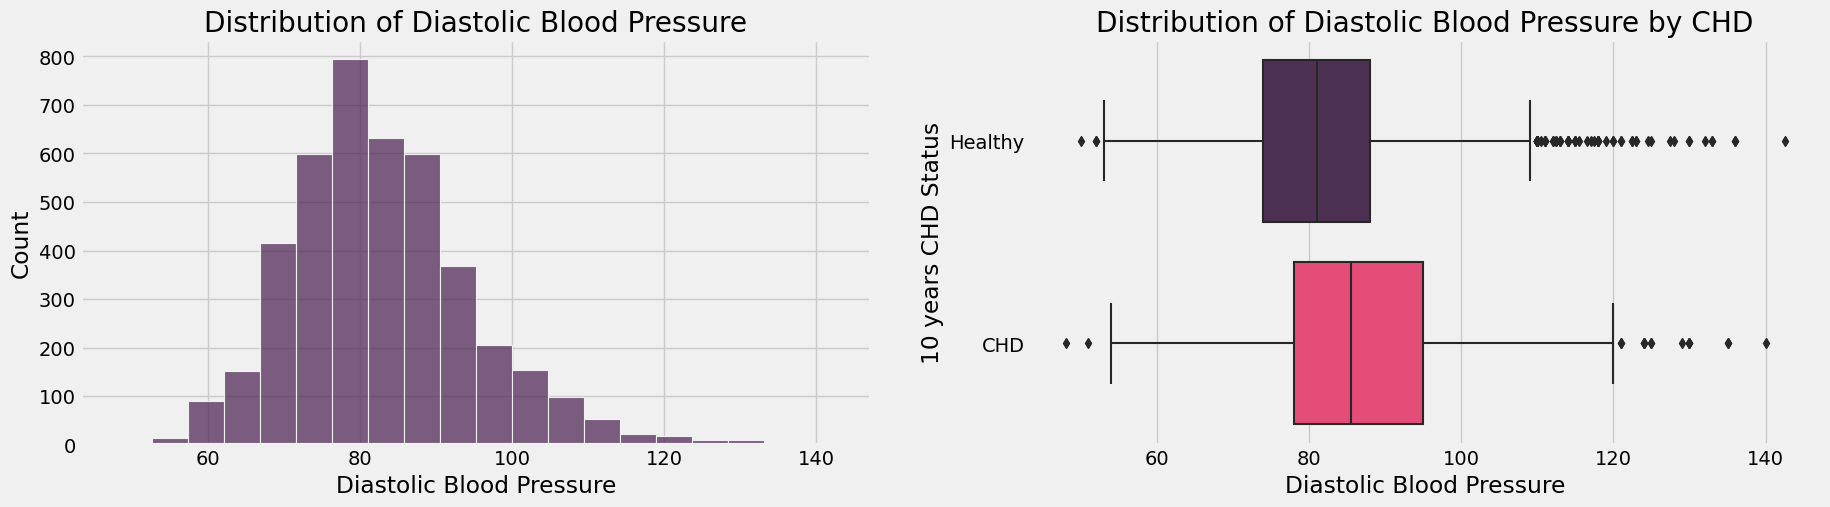

In [17]:
plot_distribution(df, "diaBP", "Diastolic Blood Pressure")

C:\Users\Sherif\AppData\Local\Temp\ipykernel_20088\3808549722.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='#fe346e', shade=True, linewidth=1.5, ec='black', alpha=0.9, zorder=3, legend=False)
C:\Users\Sherif\AppData\Local\Temp\ipykernel_20088\3808549722.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ns[feature], ax=locals()["ax"+str(plot)], color='#512b58', shade=True, linewidth=1.5, ec='black', alpha=0.9, zorder=3, legend=False)
C:\Users\Sherif\AppData\Local\Temp\ipykernel_20088\3808549722.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(s[feature], ax=loc

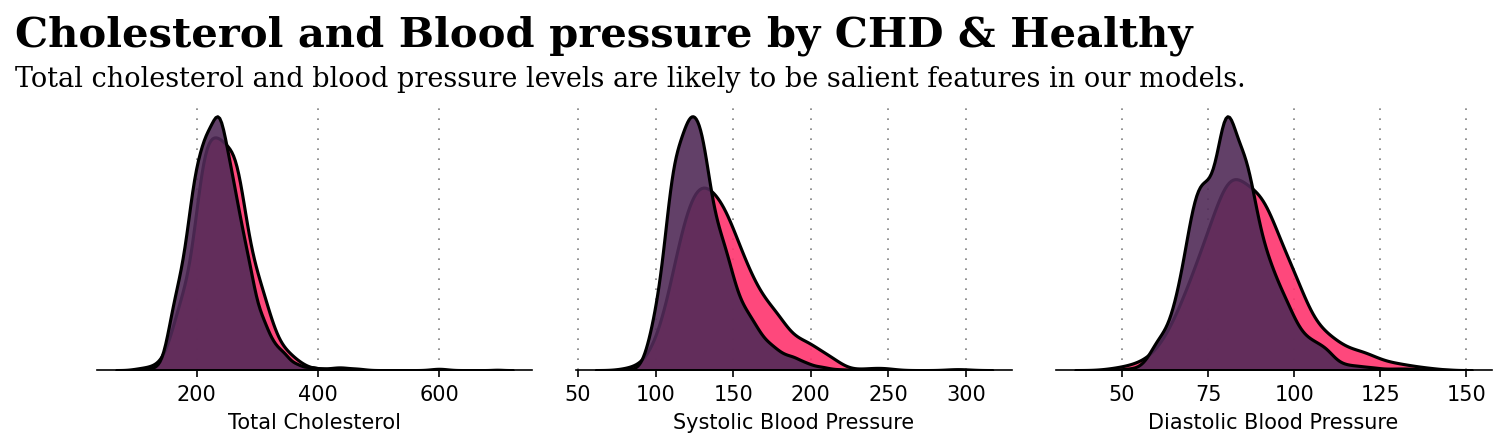

In [20]:
fig = plt.figure(figsize=(12, 12), dpi=150, facecolor='white')
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)

plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor('white')
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top", "right", "left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0
s = df[df['TenYearCHD'] == 1]
ns = df[df['TenYearCHD'] == 0]

for feature in ['totChol', 'sysBP', 'diaBP']:
    sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='#fe346e', shade=True, linewidth=1.5, ec='black', alpha=0.9, zorder=3, legend=False)
    sns.kdeplot(ns[feature], ax=locals()["ax"+str(plot)], color='#512b58', shade=True, linewidth=1.5, ec='black', alpha=0.9, zorder=3, legend=False)
    locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1, 5))
    plot += 1

ax0.set_xlabel('Total Cholesterol')
ax1.set_xlabel('Systolic Blood Pressure')
ax2.set_xlabel('Diastolic Blood Pressure')

ax0.text(-100, 0.012, 'Cholesterol and Blood pressure by CHD & Healthy', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-100, 0.0105, 'Total cholesterol and blood pressure levels are likely to be salient features in our models.', fontsize=13, fontweight='light', fontfamily='serif')

plt.show()




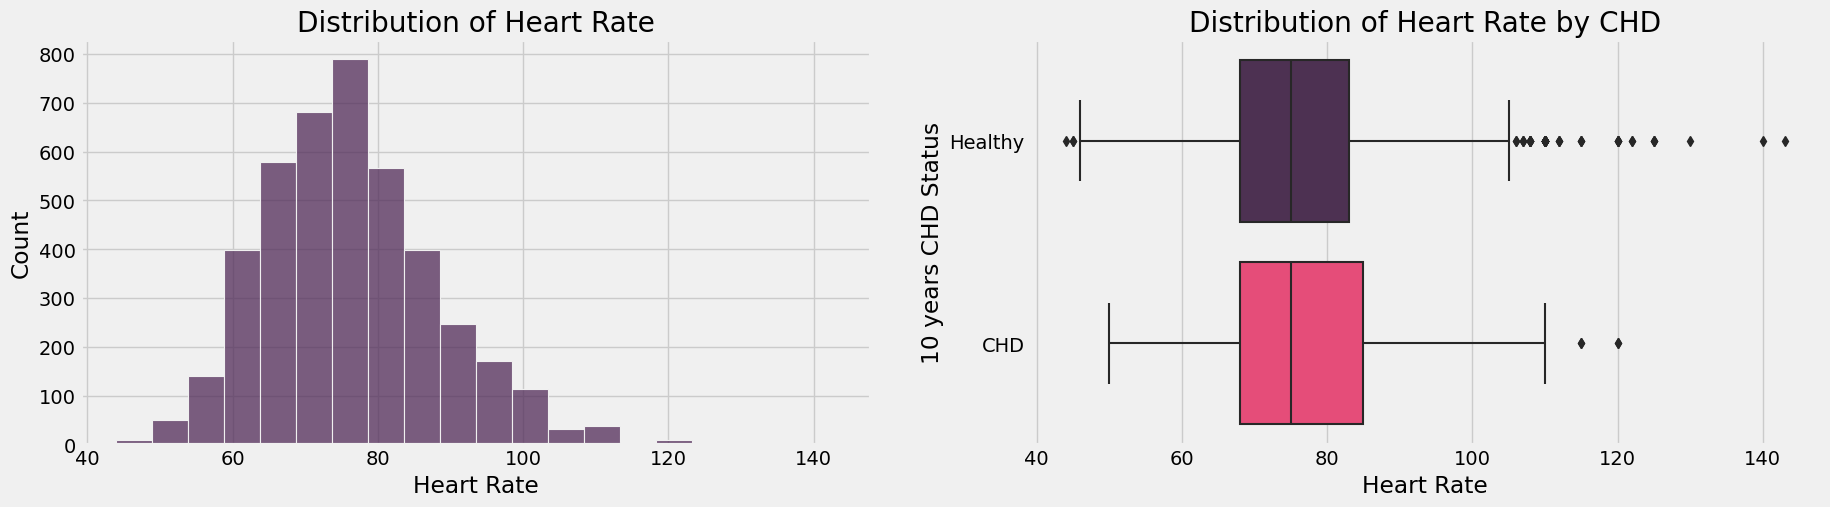

In [39]:
plot_distribution(df, "heartRate", "Heart Rate")

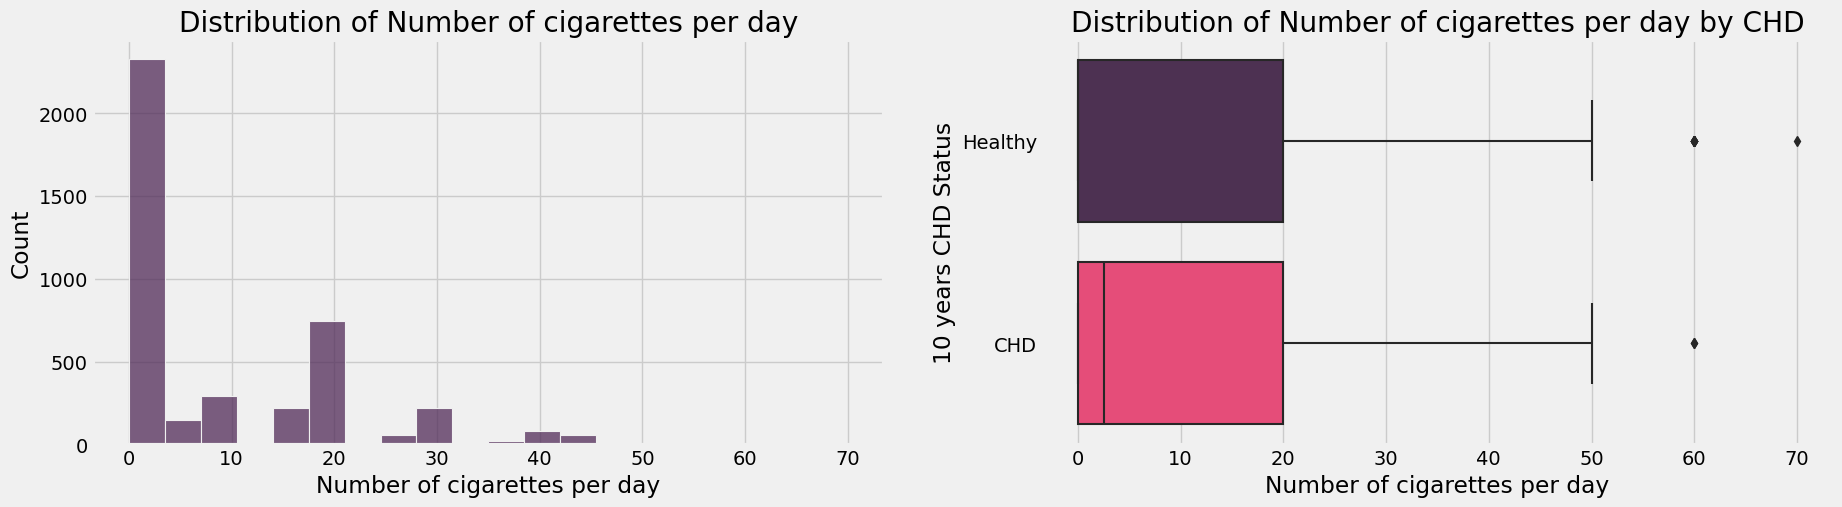

In [40]:
plot_distribution(df, "cigsPerDay", "Number of cigarettes per day")

C:\Users\Sherif\AppData\Local\Temp\ipykernel_20088\2196251599.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='#fe346e', shade=True, linewidth=1.5, ec='black', alpha=0.9, zorder=3, legend=False)
C:\Users\Sherif\AppData\Local\Temp\ipykernel_20088\2196251599.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ns[feature], ax=locals()["ax"+str(plot)], color='#512b58', shade=True, linewidth=1.5, ec='black', alpha=0.9, zorder=3, legend=False)
C:\Users\Sherif\AppData\Local\Temp\ipykernel_20088\2196251599.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(s[feature], ax=loc

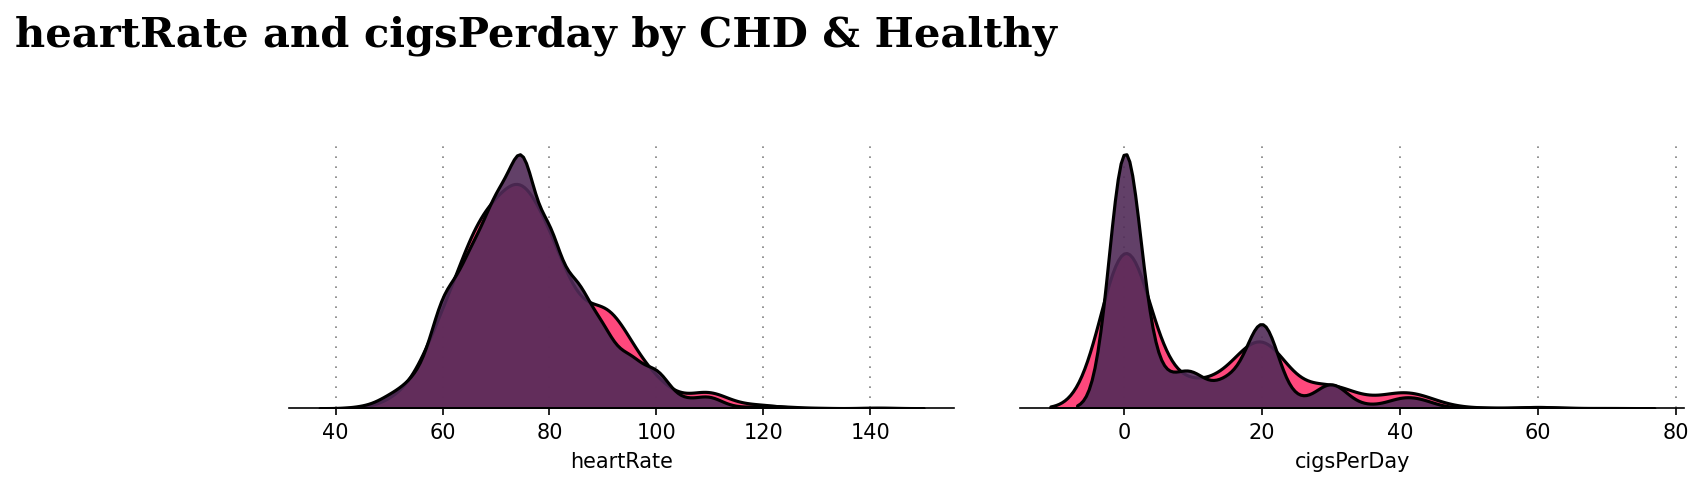

In [21]:
fig = plt.figure(figsize=(12, 12), dpi=150, facecolor='white')
gs = fig.add_gridspec(4, 2)  # Change the number of columns to 2
gs.update(wspace=0.1, hspace=0.4)

plot = 0
for row in range(0, 1):
    for col in range(0, 2):  # Only iterate over 2 columns
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor('white')
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top", "right", "left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0

s = df[df['TenYearCHD'] == 1]
ns = df[df['TenYearCHD'] == 0]

for feature in ['heartRate', 'cigsPerDay']:
    sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='#fe346e', shade=True, linewidth=1.5, ec='black', alpha=0.9, zorder=3, legend=False)
    sns.kdeplot(ns[feature], ax=locals()["ax"+str(plot)], color='#512b58', shade=True, linewidth=1.5, ec='black', alpha=0.9, zorder=3, legend=False)
    locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1, 5))
    plot += 1

ax0.set_xlabel('heartRate')
ax1.set_xlabel('cigsPerDay')

ax0.text(-20, 0.056, 'heartRate and cigsPerday by CHD & Healthy', fontsize=20, fontweight='bold', fontfamily='serif')

plt.show()

<a id="2.2"></a>
<h3 style="background-color:pink;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Univariate analysis of discrete variables</h3>

#### Let's have an overall look of the distrubtion of the discrete values

KeyError: 'TenYearCHD_statue'

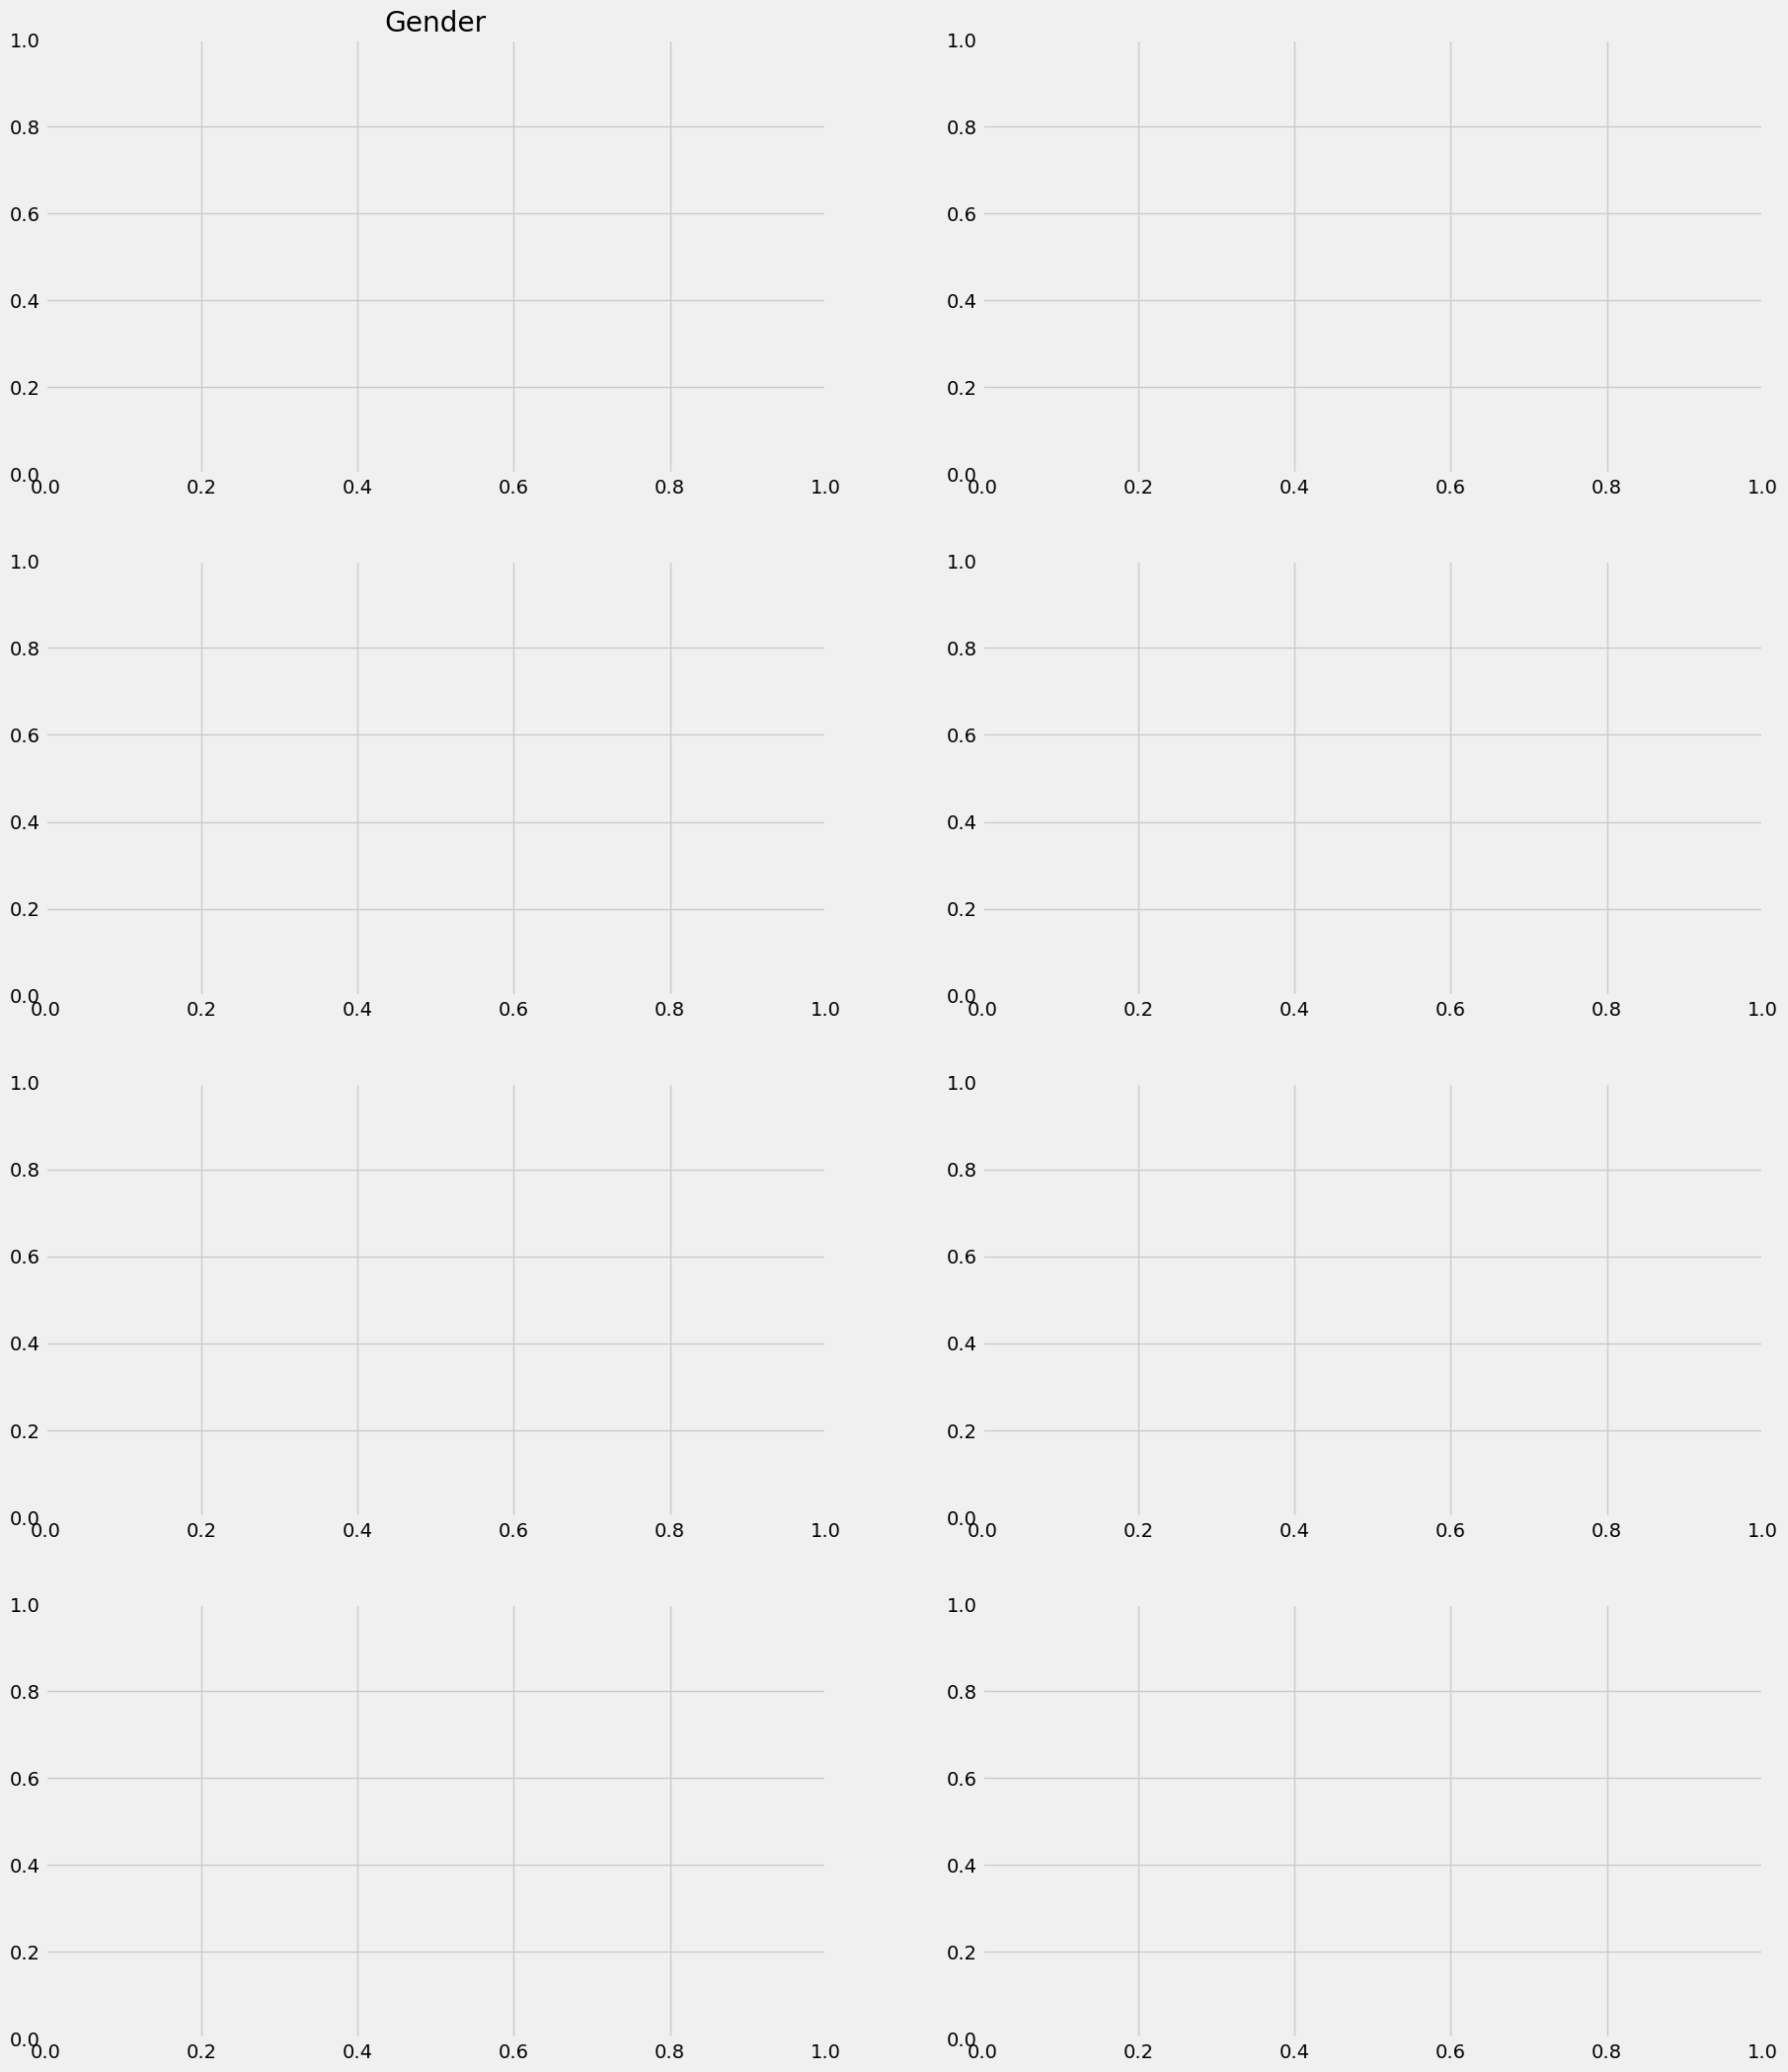

In [22]:
plt.style.use('fivethirtyeight')
custom_palette = {'Healthy': '#512b58', 'CHD': '#fe346e'}

fig, axes = plt.subplots(4, 2, figsize=(20, 25))

features = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD_statue']
titles = ['Gender', 'Education', 'Current Smoker', 'BPMeds', 'Prevalent Stroke', 'Prevalent Hyp', 'Diabetes', 'Ten Year CHD']

for i, (feature, title) in enumerate(zip(features, titles)):
    ax = axes[i // 2, i % 2]
    ax.set_title(title)
    sns.countplot(x=df[feature], hue=df['TenYearCHD_statue'], dodge=False, palette=custom_palette, ax=ax)

plt.tight_layout()
plt.show()

Since we will explore a variety of features, it is a good practice to automate the process by defining a **custom function.**
Our function will visualize **2 pie charts categorized by CHD or healthy (one for the existance of the feature and other for not )**

In [ ]:
def plot_CHD_percentage(df, group_feature, plot_title):
    # Calculate percentage of people who developed CHD for each group
    grouped = df.groupby(group_feature)['TenYearCHD'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()

    # Define custom color palette
    custom_palette = {0: '#512b58', 1:'#fe346e'}
    # Define custom x-axis labels
    x_labels = {0: f'Non-{group_feature.capitalize()}', 1: group_feature.capitalize()}
    # Define custom legend labels
    legend_labels = {0: 'Healthy', 1: 'CHD'}

    with plt.style.context('fivethirtyeight'):
        fig, ax = plt.subplots(1,2, figsize=(15,6))

        for i, group_status in enumerate(grouped[group_feature].unique()):
            data = grouped[grouped[group_feature] == group_status]
            wedges, texts, autotexts = ax[i].pie(data['percentage'], labels=[legend_labels[status] for status in data['TenYearCHD']],
                                                 colors=[custom_palette[status] for status in data['TenYearCHD']],
                                                 autopct='%1.1f%%')
            ax[i].set_title(x_labels[group_status])
            plt.setp(autotexts, size=16, color="w")
        fig.legend(wedges, legend_labels.values(), title="Ten Year CHD", loc="center right")
        
        fig.suptitle(f'Percentage of people who developed CHD within 10 years grouped by {plot_title}', fontsize=18)
        plt.show()

In [23]:
plot_CHD_percentage(df, 'male', 'Gender Status')

NameError: name 'plot_CHD_percentage' is not defined

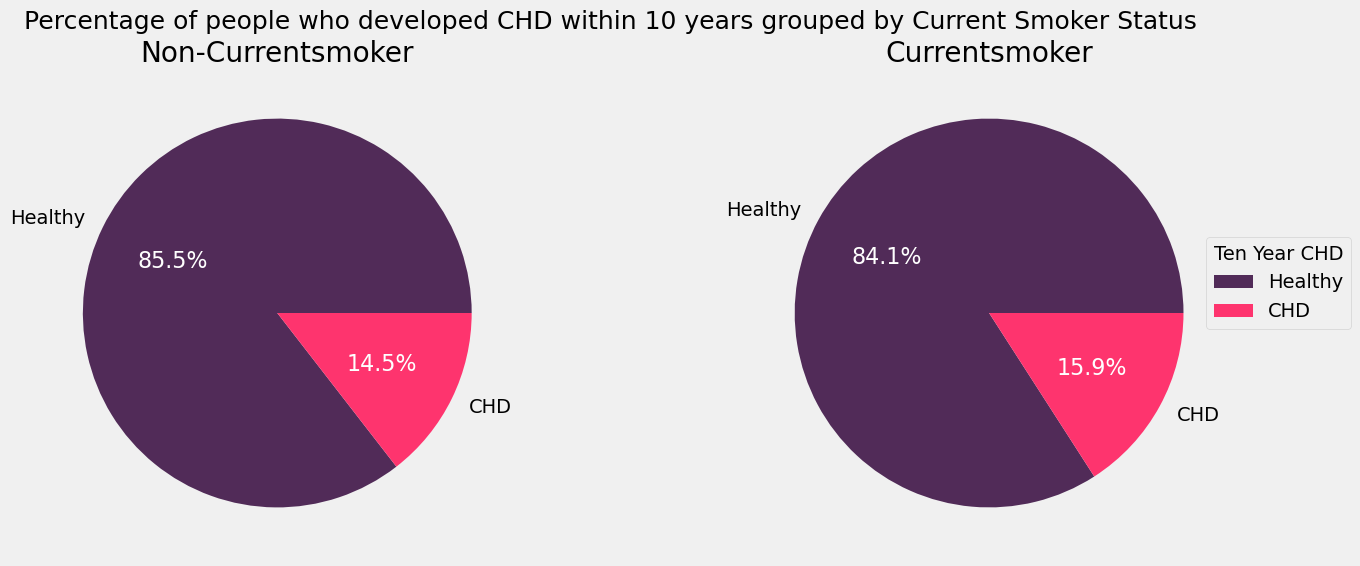

In [44]:
plot_CHD_percentage(df, 'currentSmoker', 'Current Smoker Status')

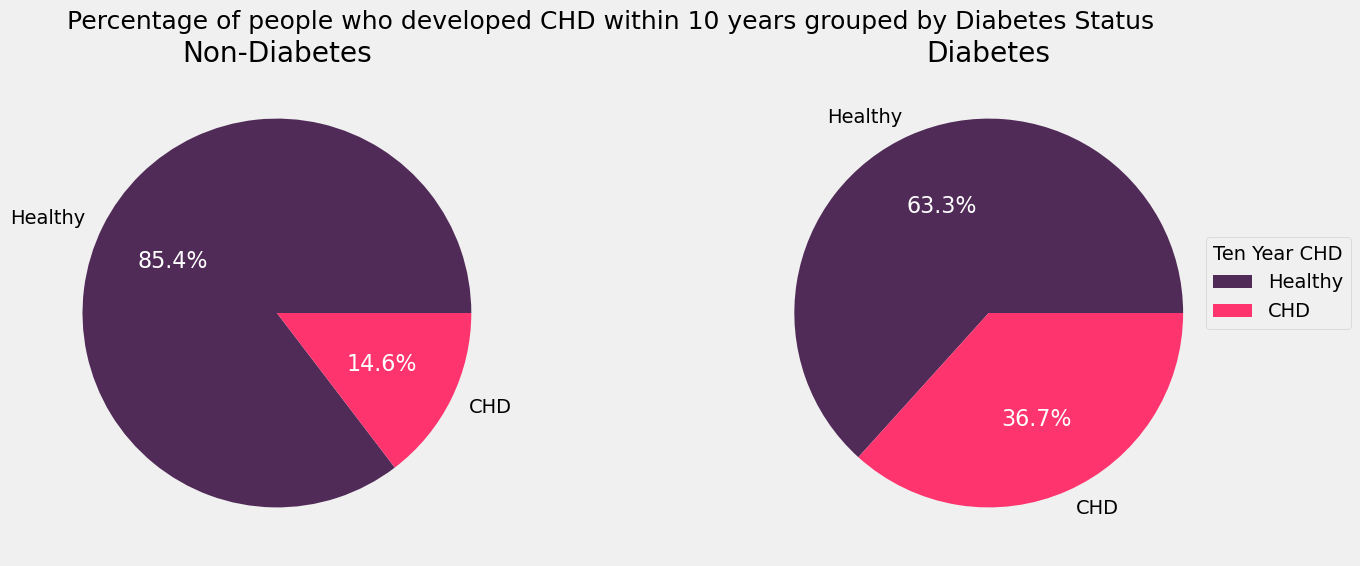

In [38]:
plot_CHD_percentage(df, 'diabetes', 'Diabetes Status')

In [24]:
plot_CHD_percentage(df, 'BPMeds', 'BPMeds Statues')

NameError: name 'plot_CHD_percentage' is not defined

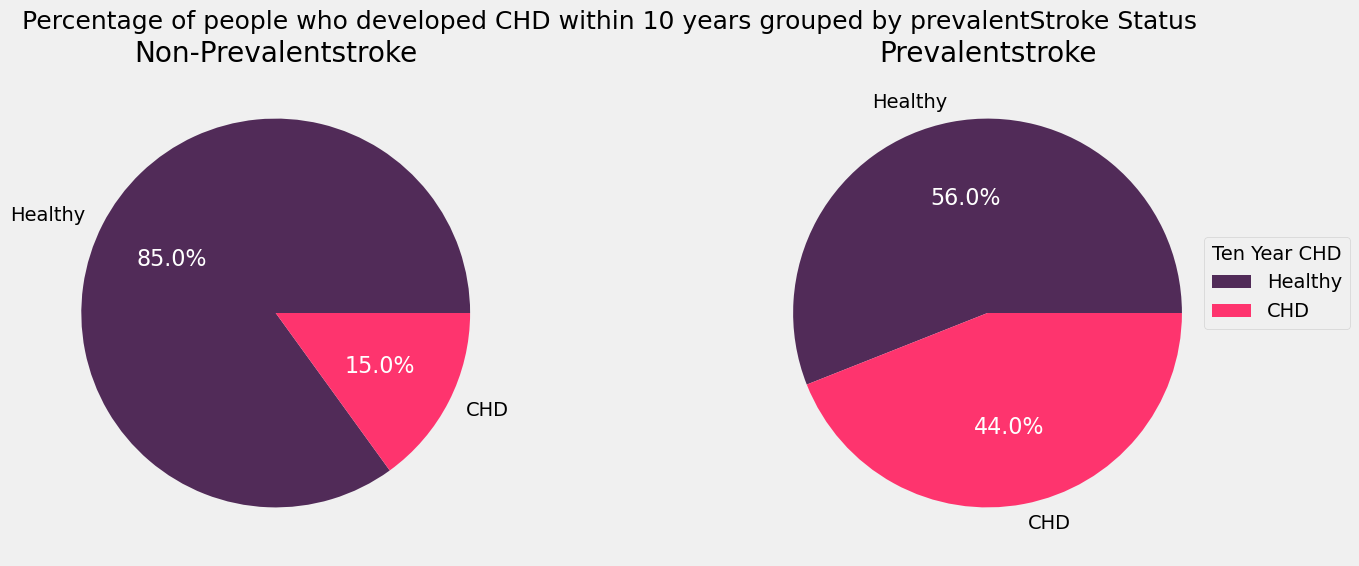

In [40]:
plot_CHD_percentage(df, 'prevalentStroke', 'prevalentStroke Status')

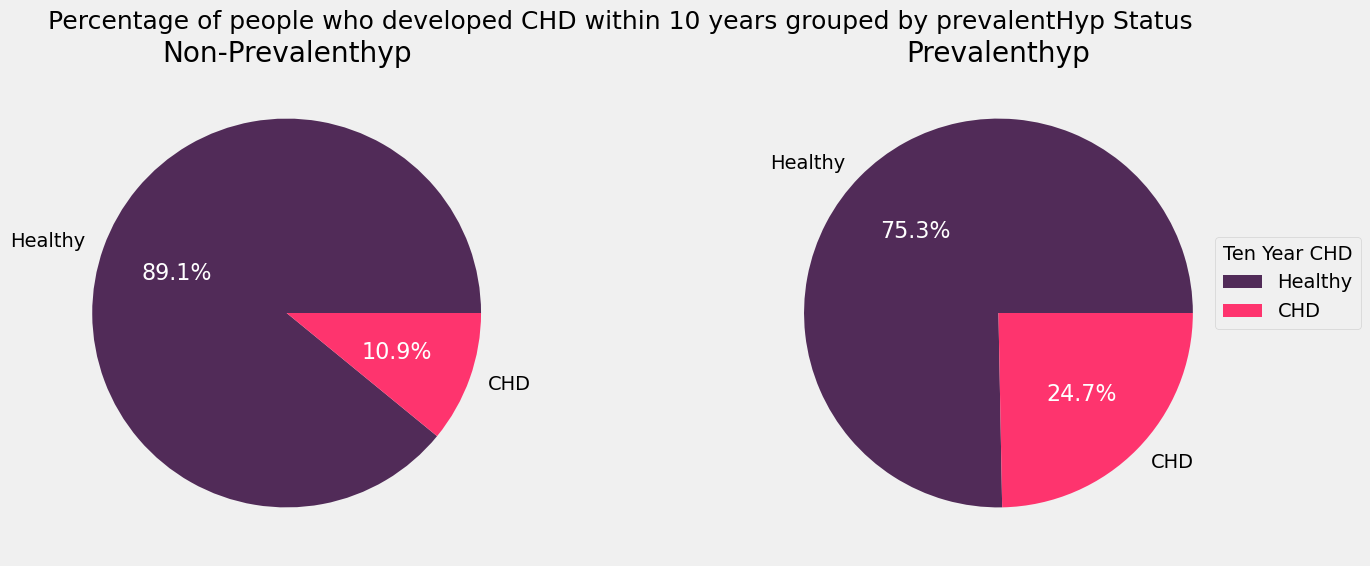

In [42]:
plot_CHD_percentage(df, 'prevalentHyp', 'prevalentHyp Status')

#### Let's have an overall look of the Correlation between all of our features

In [25]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017352,0.197596,0.317930,-0.052506,-0.004546,0.005313,0.015708,-0.070322,-0.035989,0.057933,0.081539,-0.116620,0.006083,0.088428
age,-0.028979,1.000000,-0.165883,-0.213748,-0.192791,0.122995,0.057655,0.307194,0.101258,0.262131,0.394302,0.206104,0.137026,-0.012823,0.122256,0.225256
education,0.017352,-0.165883,1.000000,0.018532,0.008085,-0.010815,-0.035112,-0.081970,-0.038680,-0.023115,-0.129631,-0.062316,-0.137737,-0.054206,-0.035721,-0.054059
currentSmoker,0.197596,-0.213748,0.018532,1.000000,0.769690,-0.048938,-0.032988,-0.103260,-0.044295,-0.046562,-0.130230,-0.107746,-0.167147,0.062356,-0.056826,0.019456
cigsPerDay,0.317930,-0.192791,0.008085,0.769690,1.000000,-0.046134,-0.032707,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092724,0.075157,-0.058960,0.057884
BPMeds,-0.052506,0.122995,-0.010815,-0.048938,-0.046134,1.000000,0.117365,0.261187,0.052047,0.080558,0.254219,0.194227,0.100756,0.015233,0.051176,0.087489
prevalentStroke,-0.004546,0.057655,-0.035112,-0.032988,-0.032707,0.117365,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.029774,-0.017676,0.018431,0.061810
prevalentHyp,0.005313,0.307194,-0.081970,-0.103260,-0.066146,0.261187,0.074830,1.000000,0.077808,0.163993,0.696755,0.615751,0.301579,0.147261,0.086834,0.177603
diabetes,0.015708,0.101258,-0.038680,-0.044295,-0.037067,0.052047,0.006949,0.077808,1.000000,0.040278,0.111283,0.050329,0.086060,0.048994,0.617627,0.097317
totChol,-0.070322,0.262131,-0.023115,-0.046562,-0.026320,0.080558,0.000067,0.163993,0.040278,1.000000,0.208908,0.165182,0.114656,0.091125,0.046408,0.082184


In [28]:
target = 'target'
data = pd.read_csv('Data/data_v1.csv')
data = data.drop('Unnamed: 0',axis=1)
data.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,target
0,Male,39,Higher Degree,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46,High School Diploma/GED,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48,High School,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61,College,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46,College,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [29]:
data.isnull().sum()

gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
target               0
dtype: int64

In [30]:
data[data[target] == 1].isnull().sum()

gender              0
age                 0
education          16
currentSmoker       0
cigsPerDay          2
BPMeds             11
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             9
sysBP               0
diaBP               0
BMI                10
heartRate           1
glucose            50
target              0
dtype: int64

In [25]:
round(data[data[target] == 0].isnull().sum() / len(data[data[target] == 0]), 2 )

gender             0.00
age                0.00
education          0.02
currentSmoker      0.00
cigsPerDay         0.01
BPMeds             0.01
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
totChol            0.01
sysBP              0.00
diaBP              0.00
BMI                0.00
heartRate          0.00
glucose            0.09
target             0.00
dtype: float64

In [26]:
data.columns

Index(['gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'target'],
      dtype='object')

In [31]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")

def pie_plot_count(col,title=""):
    fig,ax = plt.subplots(1,2,figsize=(14,6))
    plt.subplot(1,2,1)
    plt.pie(x=data[col].value_counts(),labels=data[col].value_counts().index,
           autopct='%1.1f%%',labeldistance=0.7,explode=[0.05] * len(data[col].value_counts().values))
    plt.title(title)
    plt.subplot(1,2,2)
    sns.countplot(data=data,x=col)
    plt.show() 
    
def multi_count_plot(col1,col2):
    plt.figure(figsize=(8,4))
    sns.countplot(data=data,x=col1,hue=col2)
    plt.show()

def col_vs_target(col,rows, cols, title=""):
    axis, figure = plt.subplots(rows,cols,figsize=(14  ,5 * rows))
    index = 1
    plt.suptitle(title)
    for value in data[col].unique():
        if index > data[col].nunique():
            break
        plt.subplot(rows,cols,index)
        custom_data = data[data[col] == value]
        plt.title(value)
        plt.pie(x=custom_data[target].value_counts(),labels=custom_data[target].value_counts().index,
           autopct='%1.1f%%',labeldistance=0.7,explode=[0.05] * len(custom_data[target].value_counts().values))
        index +=1
    plt.show()
def kde_plot(col):
    plt.figure(figsize=(10,6))
    sns.kdeplot(data=data[col],shade=True)
    plt.show()
    
def kde_with_target(col):
    plt.figure(figsize=(10,6))
    plot1 = sns.kdeplot(data=data[data[target] == 1][col],shade=True, label="With CHD")
    plot2 = sns.kdeplot(data=data[data[target] == 0][col],shade=True, label="Without CHD")
    plt.suptitle(f"The distribution of {col} for people with CHD and withOut CHd")
    plt.legend()
    plt.show()

In [32]:
def col_details(col_name):
    
    print(f"####### {col_name} and its type {data[col_name].dtype} ########")
    
    print(f"\nNumber of unique Values {data[col_name].nunique()}")
    
    print(f"There are {data[col_name].isnull().sum()} Null Values")
    random_number = np.random.randint(4000)
    print(f"\nSome Random Data \n {data[col_name][random_number:random_number + 5]}")
    print(f"\nTop 5 Values {data[col_name].value_counts().index[:5]}")
    if data[col_name].dtype != "object":
        print(f"Max value is {data[col_name].max()} Min {data[col_name].min()}")
    
    
def IQR_bands(col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_band = Q3 + IQR * 1.5
    lower_band = Q1 - IQR * 1.5
    return upper_band , lower_band

In [450]:
# # male , female >> 1- Pie plot 
#                    2 - Count >

In [27]:
col_details("gender")

NameError: name 'col_details' is not defined

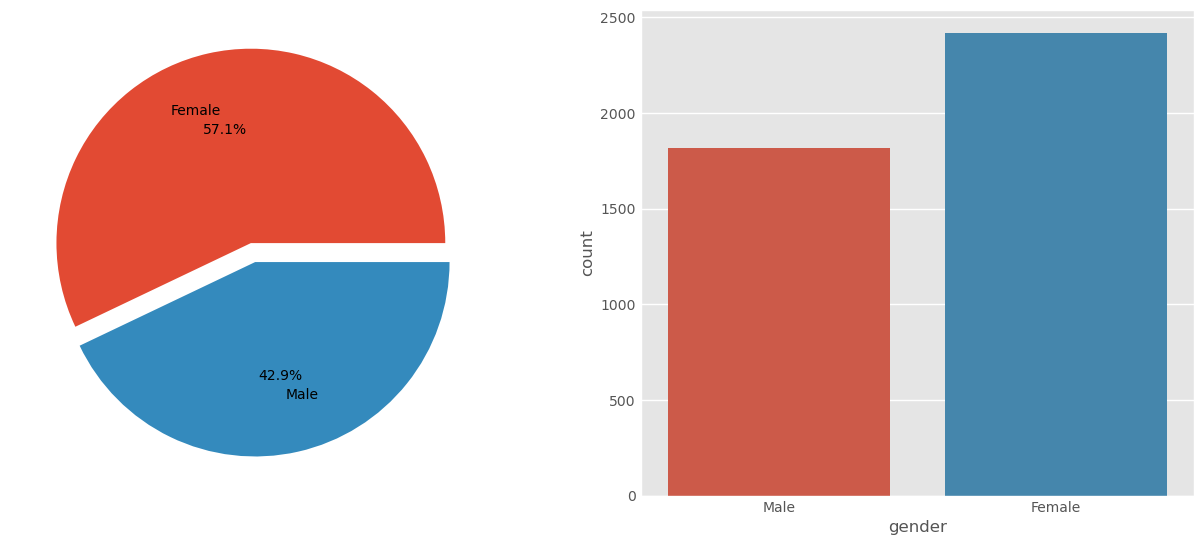

In [52]:
pie_plot_count("gender")

In [28]:
col_vs_target("gender",1,2, "Precentage of CHD in term of gender")

NameError: name 'col_vs_target' is not defined

Numerical > 1 - Distribuation : 2 - Kde
                                2- Histogram

### Age

In [454]:
col_details("age")

####### age and its type int64 ########

Number of unique Values 39
There are 0 Null Values

Some Random Data 
 2730    46
2731    56
2732    40
2733    53
2734    63
Name: age, dtype: int64

Top 5 Values Int64Index([40, 46, 42, 41, 48], dtype='int64')
Max value is 70 Min 32


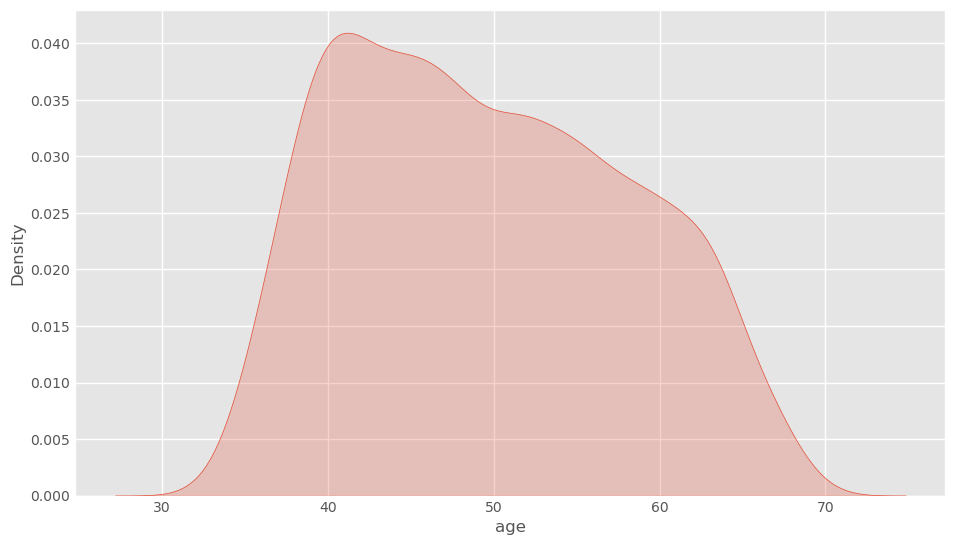

In [455]:
kde_plot("age")

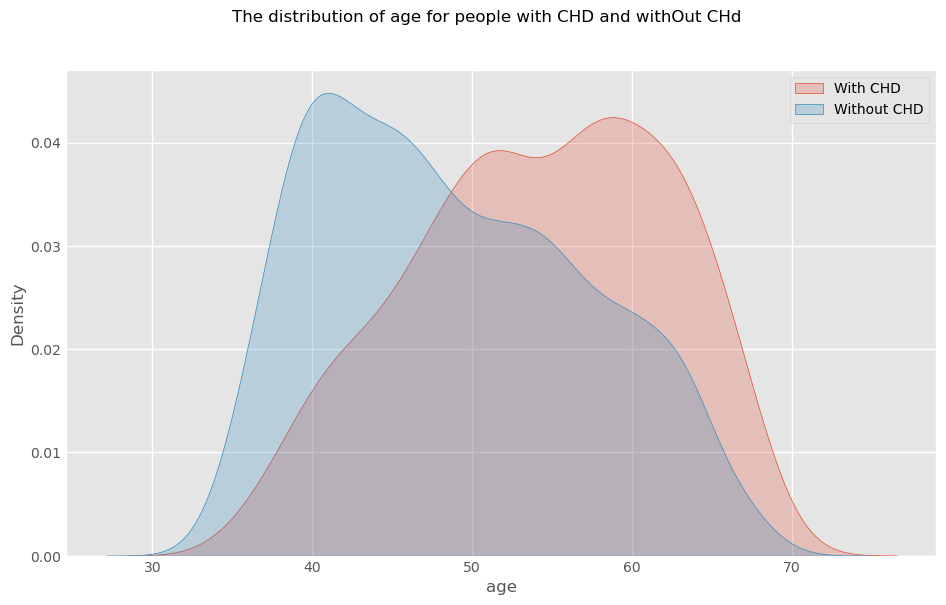

In [456]:
kde_with_target("age")

In [29]:
print("the mean of Age of people with chd is ",data[data[target] == 1]['age'].median())

the mean of Age of people with chd is  55.0


In [458]:
print("the mean of Age of people without chd is ",data[data[target] == 0]['age'].median())

the mean of Age of people without chd is  48.0


### Education

In [51]:
col_details("education")

NameError: name 'col_details' is not defined

In [105]:
len(data.loc[data.education.isnull(),'education'])

0

In [52]:
data['education'].mode()[0]

'High School'

In [461]:
print(f"The percentage of Null Values is {round(len(data[data.education == 'nan']) / len(data) * 100, 2)} %")

The percentage of Null Values is 0.0 %


In [97]:
data.loc[data.education.isnull(),'education'] = data['education'].mode()[0]

In [98]:
print(f"The percentage of Null Values is {round(len(data[data.education == 'nan']) / len(data) * 100, 2)} %")

The percentage of Null Values is 0.0 %


In [99]:
len(data.loc[data.education.isnull(),'education'])

0

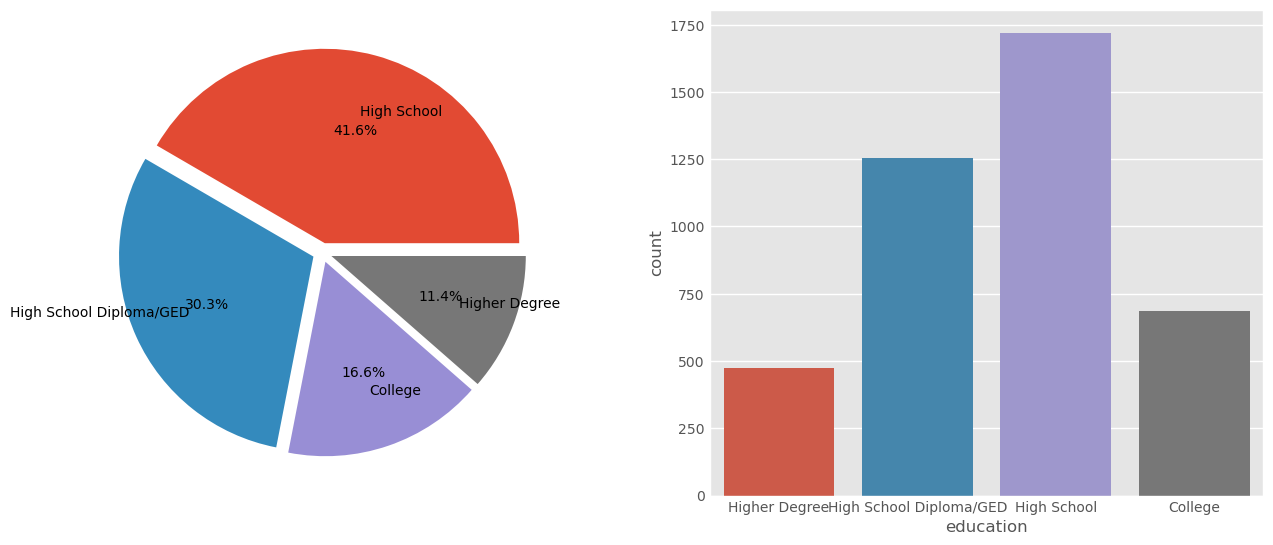

In [34]:
pie_plot_count("education")

In [32]:
col_vs_target("education",2,2, "Precentage of CHD in term of education")

NameError: name 'col_vs_target' is not defined

In [466]:
data.columns

Index(['gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'target'],
      dtype='object')

### currentSmoker

In [467]:
col_details('currentSmoker')

####### currentSmoker and its type int64 ########

Number of unique Values 2
There are 0 Null Values

Some Random Data 
 3472    1
3473    0
3474    1
3475    0
3476    0
Name: currentSmoker, dtype: int64

Top 5 Values Int64Index([0, 1], dtype='int64')
Max value is 1 Min 0


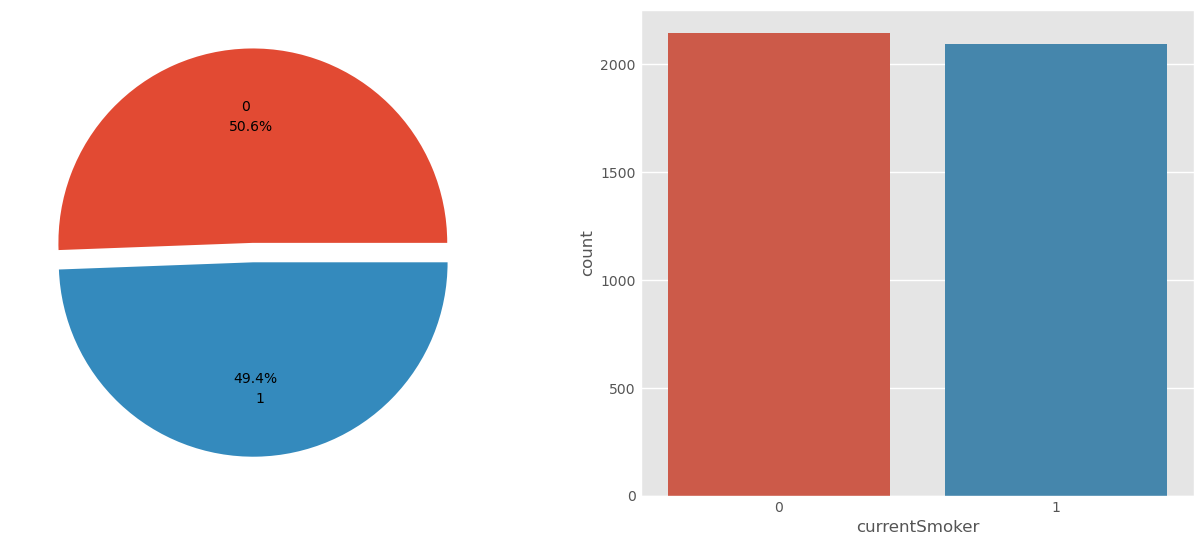

In [468]:
pie_plot_count('currentSmoker')

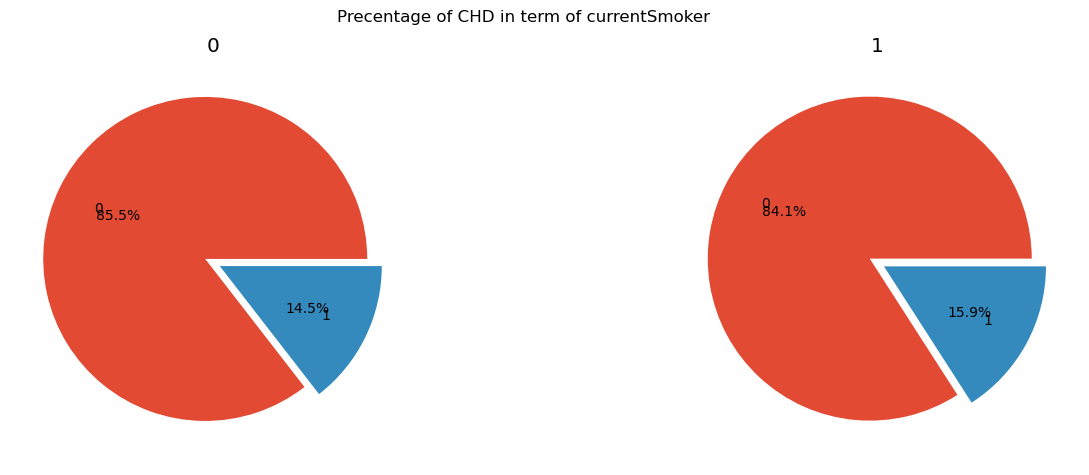

In [469]:
col_vs_target("currentSmoker",1,2, "Precentage of CHD in term of currentSmoker")

### cigsPerDay

In [470]:
col_details("cigsPerDay")

####### cigsPerDay and its type float64 ########

Number of unique Values 33
There are 29 Null Values

Some Random Data 
 2687     0.0
2688     0.0
2689     0.0
2690     0.0
2691    20.0
Name: cigsPerDay, dtype: float64

Top 5 Values Float64Index([0.0, 20.0, 30.0, 15.0, 10.0], dtype='float64')
Max value is 70.0 Min 0.0


In [111]:
data.columns

Index(['gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'target'],
      dtype='object')

In [113]:
 (data['cigsPerDay'].isnull().sum())


29

In [114]:
data[data['cigsPerDay'].isnull()] = data.cigsPerDay.mean()

In [115]:
(data['cigsPerDay'].isnull().sum())

0

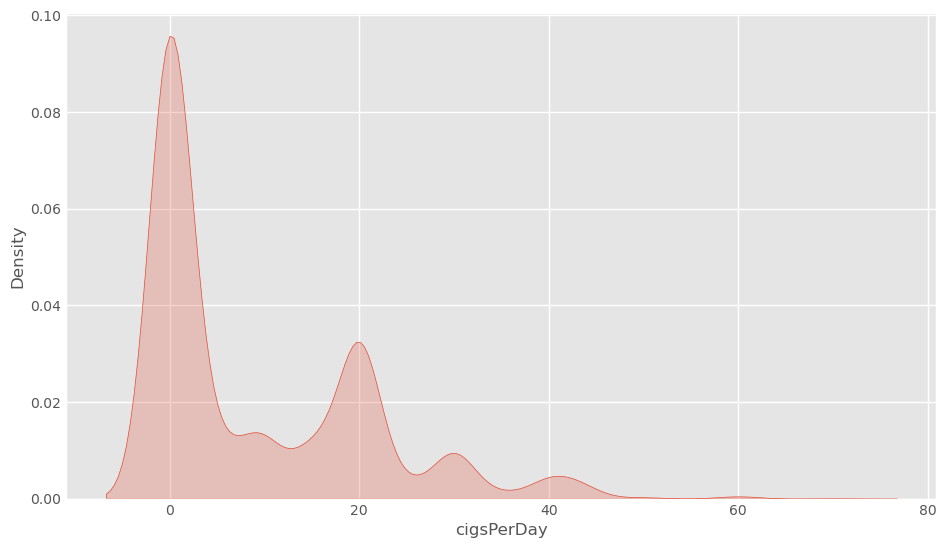

In [471]:
kde_plot("cigsPerDay")

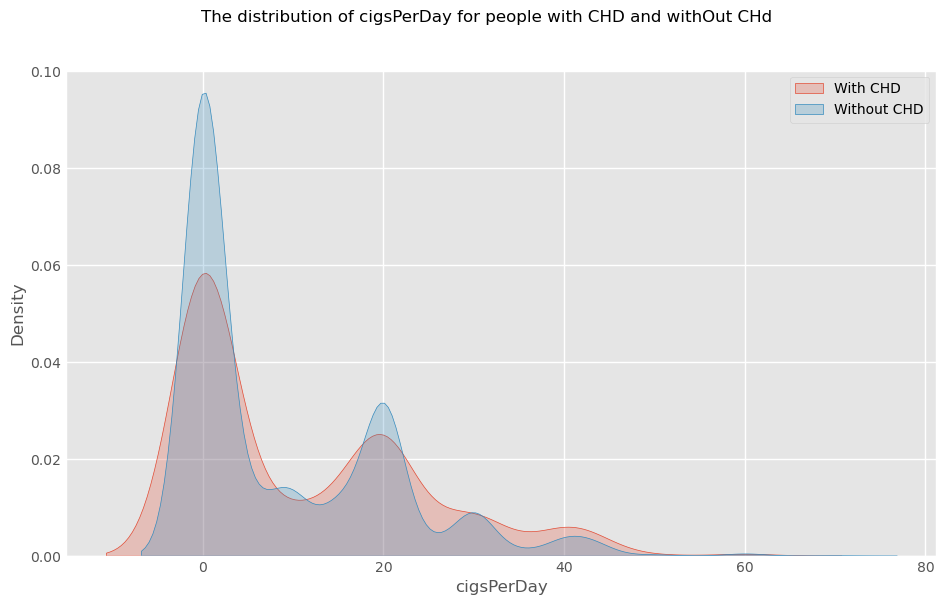

In [472]:
kde_with_target("cigsPerDay")

In [35]:
print("the mean of cigsPerDay of people with chd is ",data[data[target] == 1]['cigsPerDay'].mean())

the mean of cigsPerDay of people with chd is  10.629283489096574


In [36]:
print("the mean of cigsPerDay of people with chd is ",data[data[target] == 0]['cigsPerDay'].mean())

the mean of cigsPerDay of people with chd is  8.71040089711242


<AxesSubplot:>

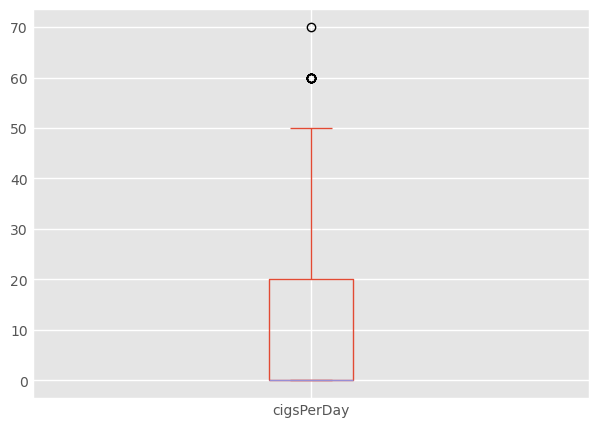

In [475]:
data["cigsPerDay"].plot(kind="box")

In [476]:
IQR_bands("cigsPerDay")

(50.0, -30.0)

In [477]:
data[data['cigsPerDay'] > 50]

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,target
327,Male,56,High School,1,60.0,0.0,0,0,0,246.0,125.0,79.0,29.64,70.0,85.0,0
721,Male,59,High School,1,60.0,0.0,0,1,0,298.0,153.5,105.0,25.05,70.0,84.0,0
1054,Male,58,High School Diploma/GED,1,60.0,0.0,0,1,0,250.0,150.0,97.0,32.00,75.0,65.0,0
1452,Male,39,High School,1,60.0,0.0,0,0,0,215.0,112.0,65.0,23.60,59.0,78.0,0
1468,Male,50,High School,1,60.0,0.0,0,1,0,340.0,134.0,95.0,30.46,85.0,86.0,0
1488,Male,37,Higher Degree,1,60.0,0.0,0,0,0,254.0,122.5,82.5,23.87,88.0,83.0,0
1849,Male,48,High School,1,60.0,0.0,0,0,0,252.0,104.0,73.5,23.03,70.0,77.0,0
2709,Male,46,High School,1,60.0,0.0,0,0,0,285.0,121.0,82.0,27.62,70.0,79.0,0
2710,Male,49,High School Diploma/GED,1,60.0,0.0,0,0,0,213.0,123.0,75.0,24.84,70.0,NaN,1
3008,Male,40,College,1,70.0,0.0,0,1,0,210.0,132.0,86.0,31.57,98.0,80.0,0


In [34]:
print(len(data[data['cigsPerDay'] > 50]))

12


### BPMeds
whether or not the patient was on blood pressure medication

In [35]:
col_details("BPMeds")

NameError: name 'col_details' is not defined

In [37]:
data['BPMeds'].isnull().sum() / len(data)

0.012505899008966493

In [38]:
data.loc[data.BPMeds.isnull() ,'BPMeds'] = data['BPMeds'].mode()[0]

In [39]:
data['BPMeds'].isnull().sum() / len(data)

0.0

In [38]:
data.columns

Index(['gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'target'],
      dtype='object')

### prevalentStroke
whether or not the patient had previously had a stroke

In [40]:
col_details("prevalentStroke")

####### prevalentStroke and its type int64 ########

Number of unique Values 2
There are 0 Null Values

Some Random Data 
 1103    0
1104    0
1105    0
1106    0
1107    0
Name: prevalentStroke, dtype: int64

Top 5 Values Int64Index([0, 1], dtype='int64')
Max value is 1 Min 0


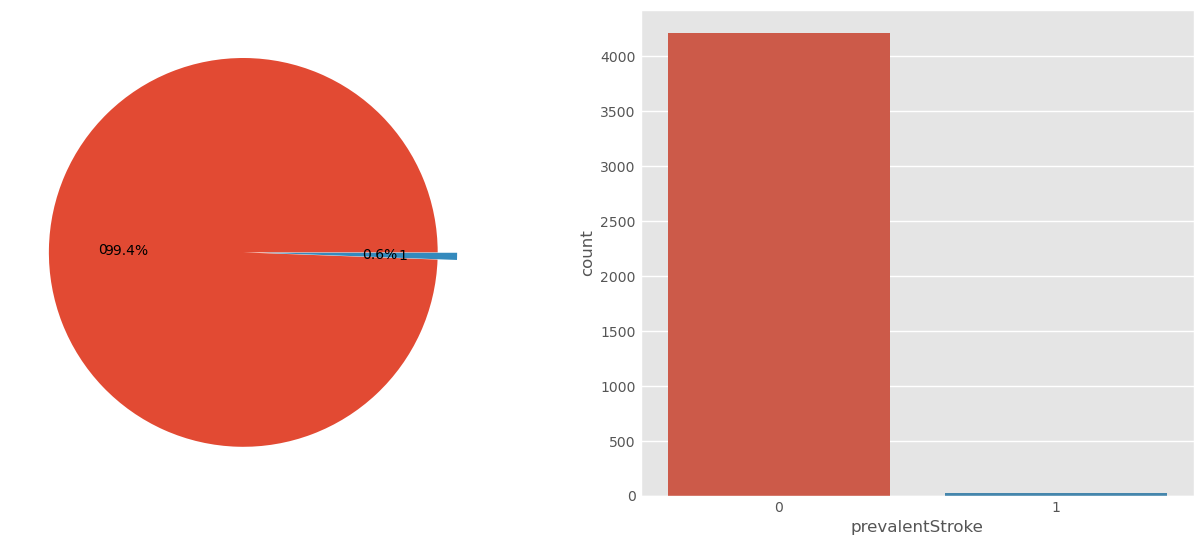

In [485]:
pie_plot_count("prevalentStroke")

In [486]:
data[data.prevalentStroke == 1][target].value_counts()

0    14
1    11
Name: target, dtype: int64

### prevalentHyp
whether or not the patient was hypertensive

In [487]:
col_details('prevalentHyp')

####### prevalentHyp and its type int64 ########

Number of unique Values 2
There are 0 Null Values

Some Random Data 
 469    1
470    0
471    1
472    0
473    0
Name: prevalentHyp, dtype: int64

Top 5 Values Int64Index([0, 1], dtype='int64')
Max value is 1 Min 0


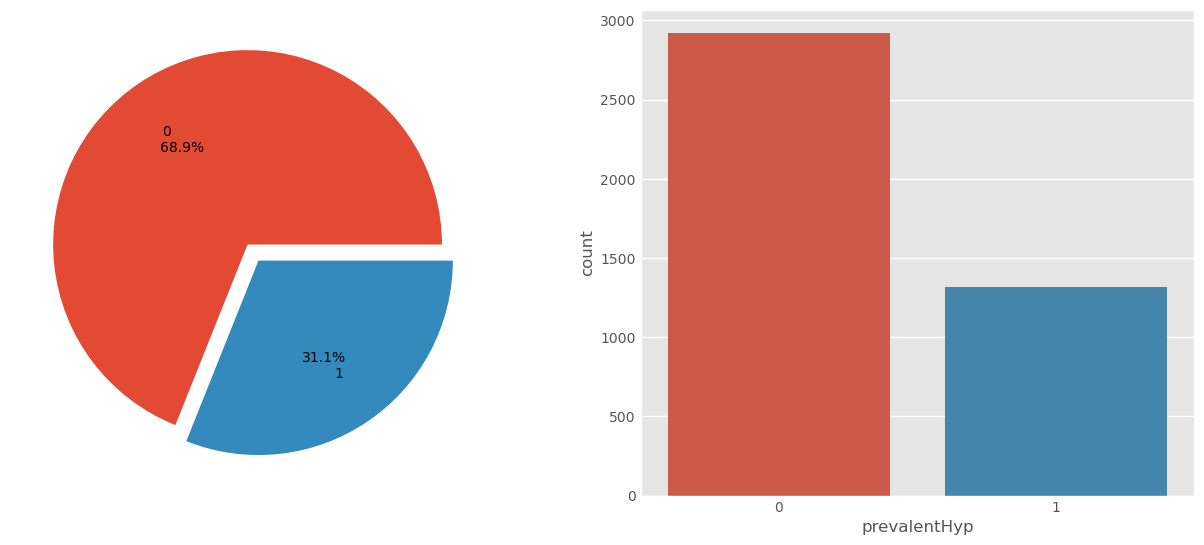

In [488]:
pie_plot_count('prevalentHyp')

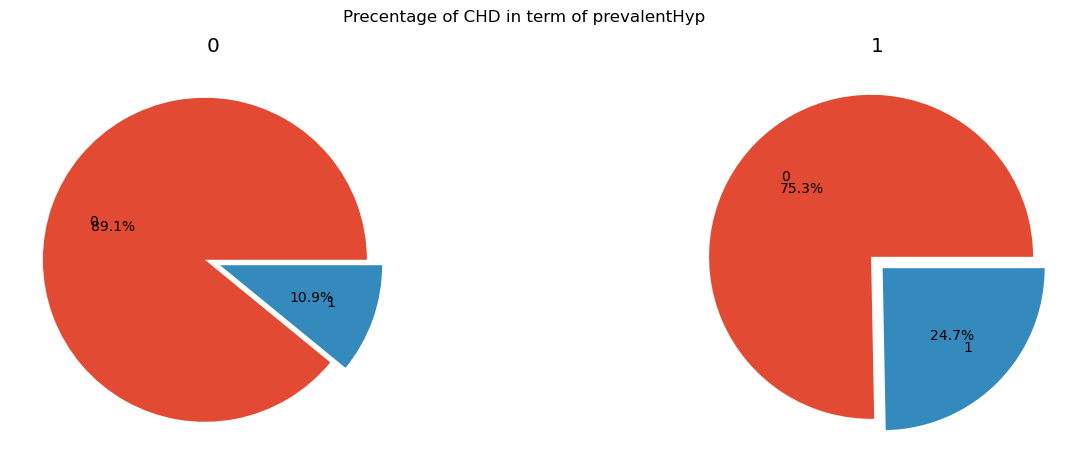

In [489]:
col_vs_target("prevalentHyp",1,2, "Precentage of CHD in term of prevalentHyp")

### Diabetes

In [490]:
col_details("diabetes")

####### diabetes and its type int64 ########

Number of unique Values 2
There are 0 Null Values

Some Random Data 
 1916    0
1917    0
1918    0
1919    0
1920    0
Name: diabetes, dtype: int64

Top 5 Values Int64Index([0, 1], dtype='int64')
Max value is 1 Min 0


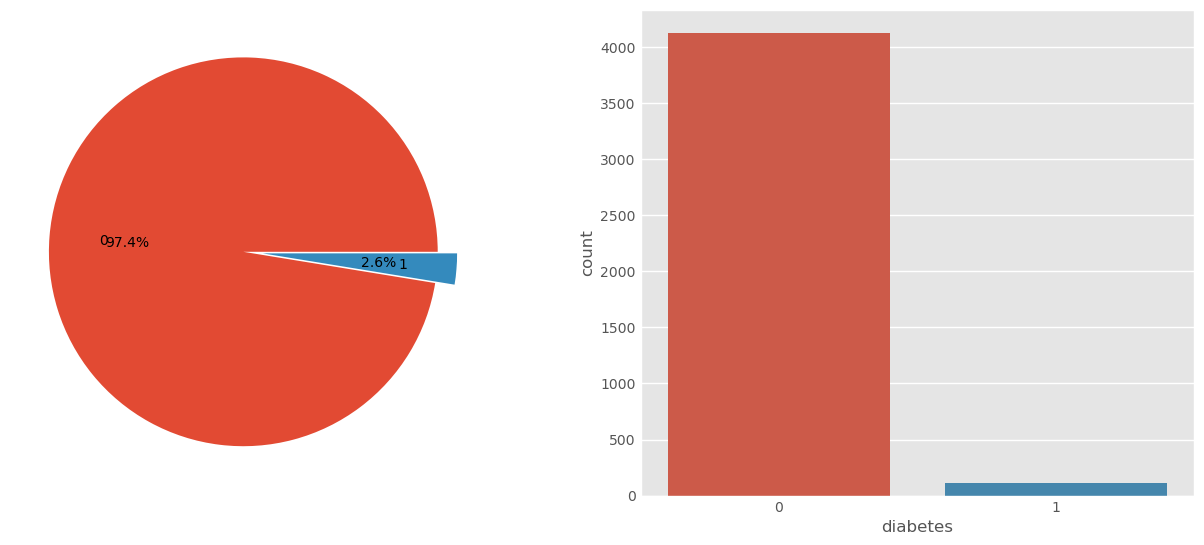

In [491]:
pie_plot_count("diabetes")

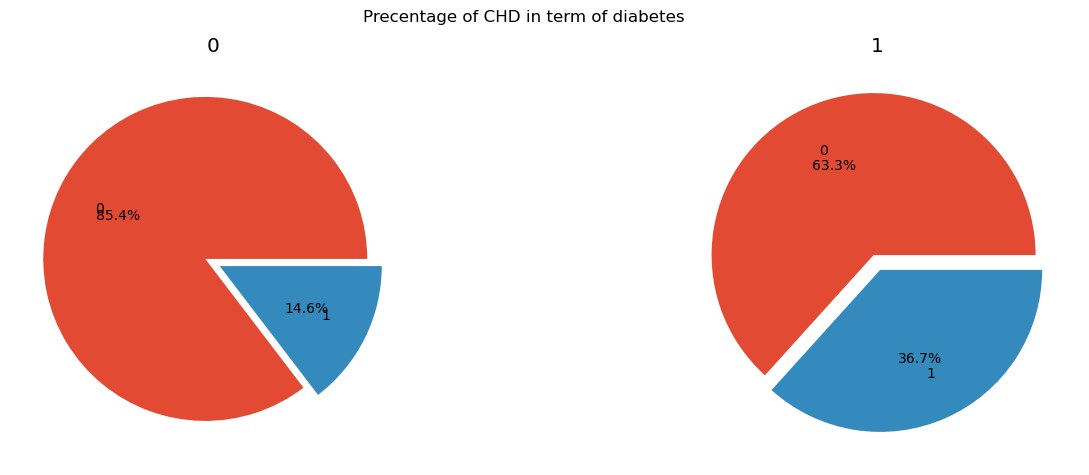

In [492]:
col_vs_target("diabetes",1,2, "Precentage of CHD in term of diabetes")

In [493]:
data.columns

Index(['gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'target'],
      dtype='object')

### totChol
total cholesterol level

In [494]:
col_details('totChol')

####### totChol and its type float64 ########

Number of unique Values 248
There are 50 Null Values

Some Random Data 
 1005    240.0
1006    220.0
1007    310.0
1008    186.0
1009    220.0
Name: totChol, dtype: float64

Top 5 Values Float64Index([240.0, 220.0, 260.0, 210.0, 232.0], dtype='float64')
Max value is 696.0 Min 107.0


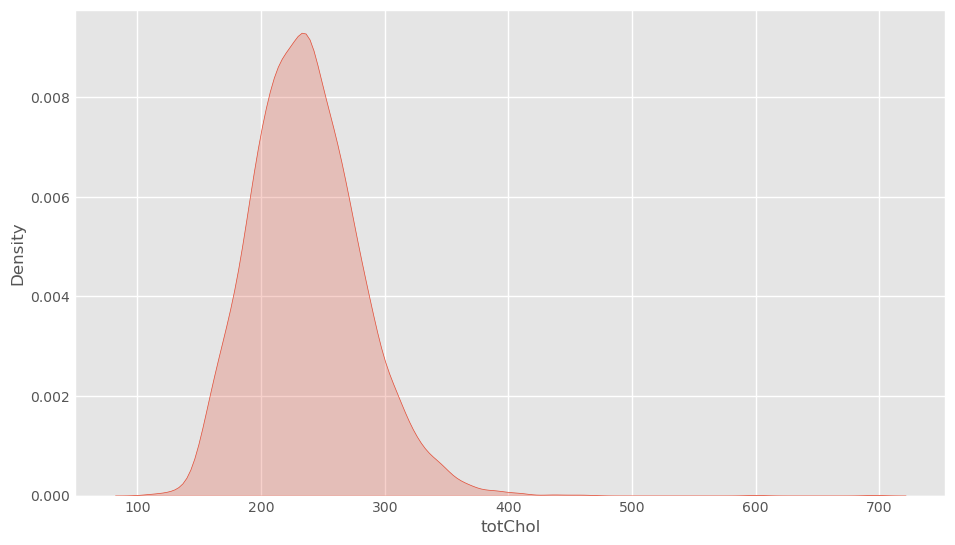

In [495]:
kde_plot("totChol")

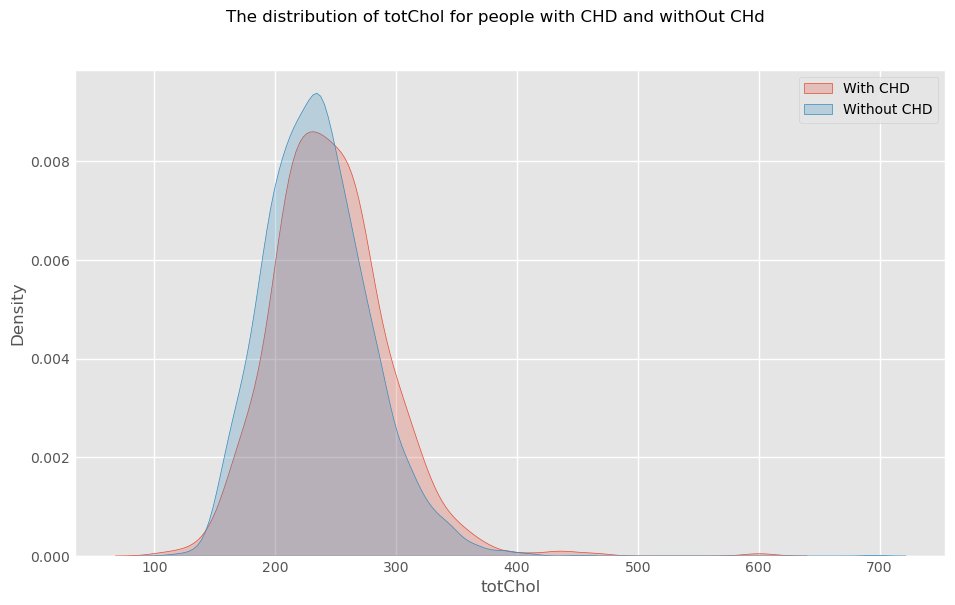

In [496]:
kde_with_target("totChol")

In [497]:
IQR_bands("totChol")

(348.5, 120.5)

### sysBP

In [498]:
col_details("sysBP")

####### sysBP and its type float64 ########

Number of unique Values 234
There are 0 Null Values

Some Random Data 
 2038    120.0
2039    126.0
2040    100.0
2041    157.0
2042    134.5
Name: sysBP, dtype: float64

Top 5 Values Float64Index([120.0, 130.0, 110.0, 115.0, 125.0], dtype='float64')
Max value is 295.0 Min 83.5


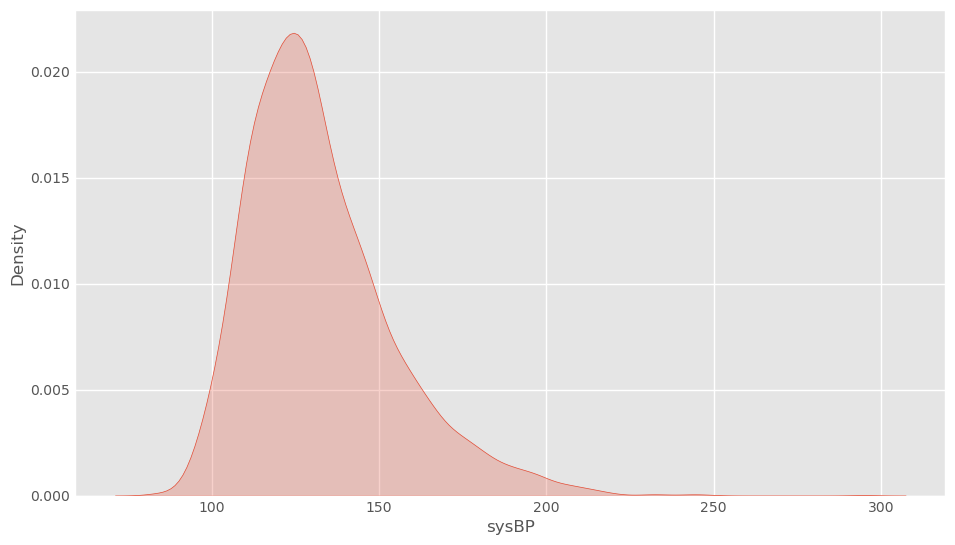

In [499]:
kde_plot("sysBP")

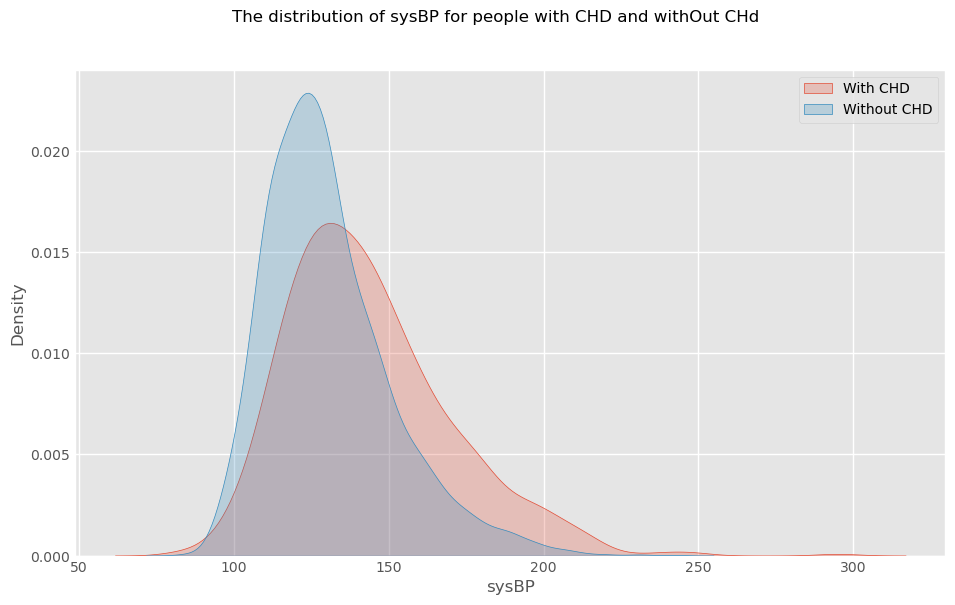

In [500]:
kde_with_target("sysBP")

In [501]:
IQR_bands("sysBP")

(184.5, 76.5)

### diaBP
diastolic blood pressure

In [502]:
col_details("diaBP")

####### diaBP and its type float64 ########

Number of unique Values 146
There are 0 Null Values

Some Random Data 
 137     70.0
138    100.0
139     81.5
140     82.0
141     72.5
Name: diaBP, dtype: float64

Top 5 Values Float64Index([80.0, 82.0, 85.0, 70.0, 81.0], dtype='float64')
Max value is 142.5 Min 48.0


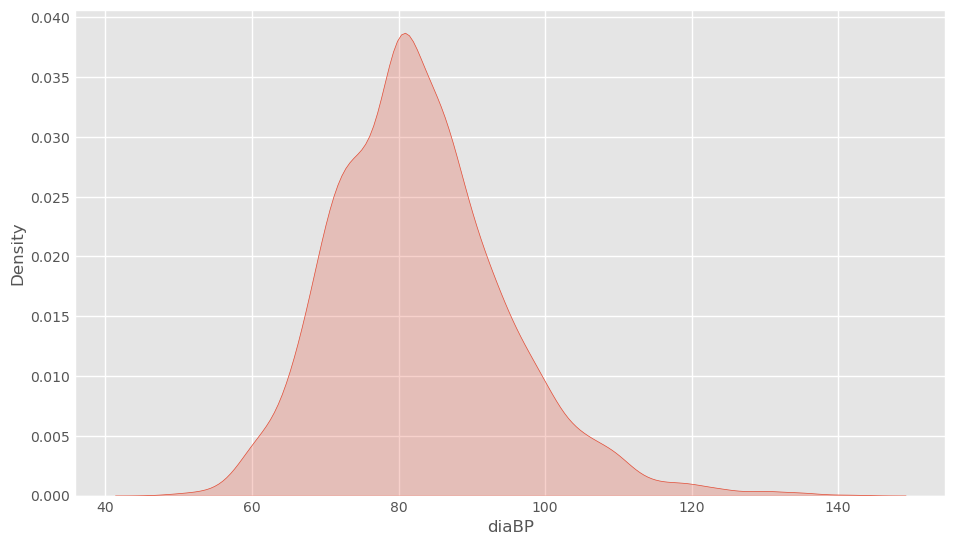

In [503]:
kde_plot("diaBP")

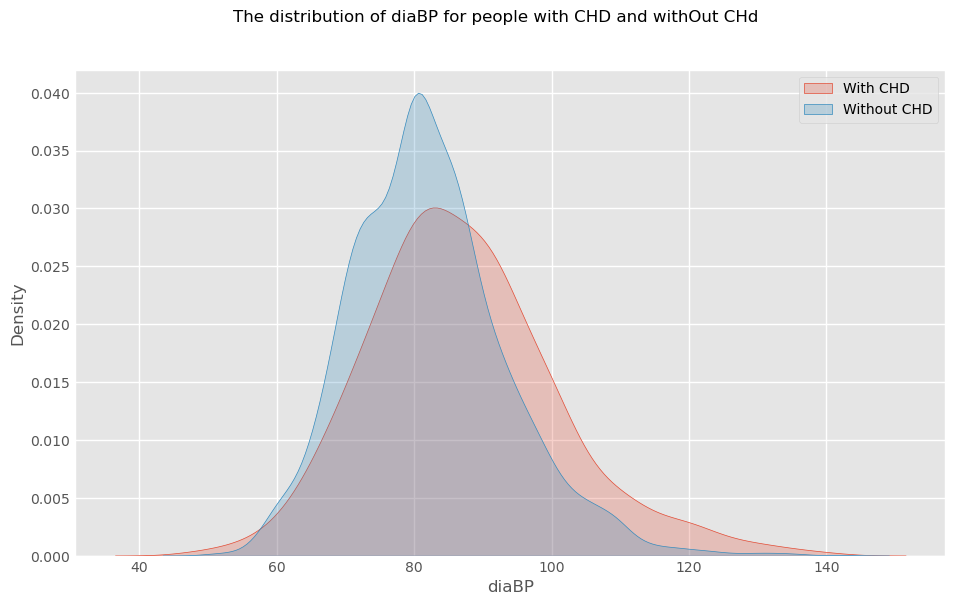

In [504]:
kde_with_target("diaBP")

In [505]:
IQR_bands("diaBP")

(112.1875, 52.6875)

### Body Mass Index , BMI

In [506]:
col_details("BMI")

####### BMI and its type float64 ########

Number of unique Values 1363
There are 19 Null Values

Some Random Data 
 1222    24.19
1223    21.30
1224    30.85
1225    27.04
1226    21.16
Name: BMI, dtype: float64

Top 5 Values Float64Index([22.19, 22.54, 23.48, 22.91, 23.09], dtype='float64')
Max value is 56.8 Min 15.54


In [41]:
data.loc[data.BMI.isnull(),'BMI'] = data.BMI.median()

In [87]:
len(data.loc[data.BMI.isnull(),'BMI'])

0

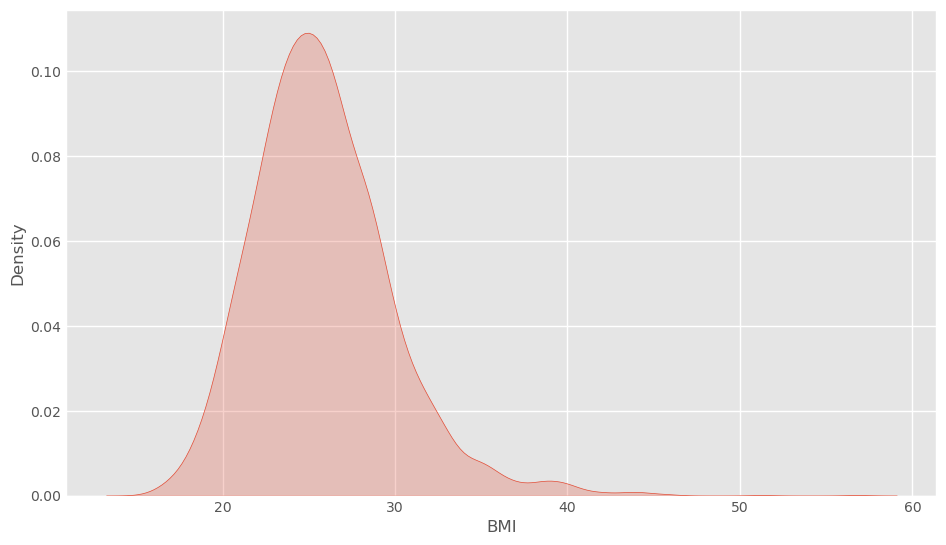

In [509]:
kde_plot("BMI")

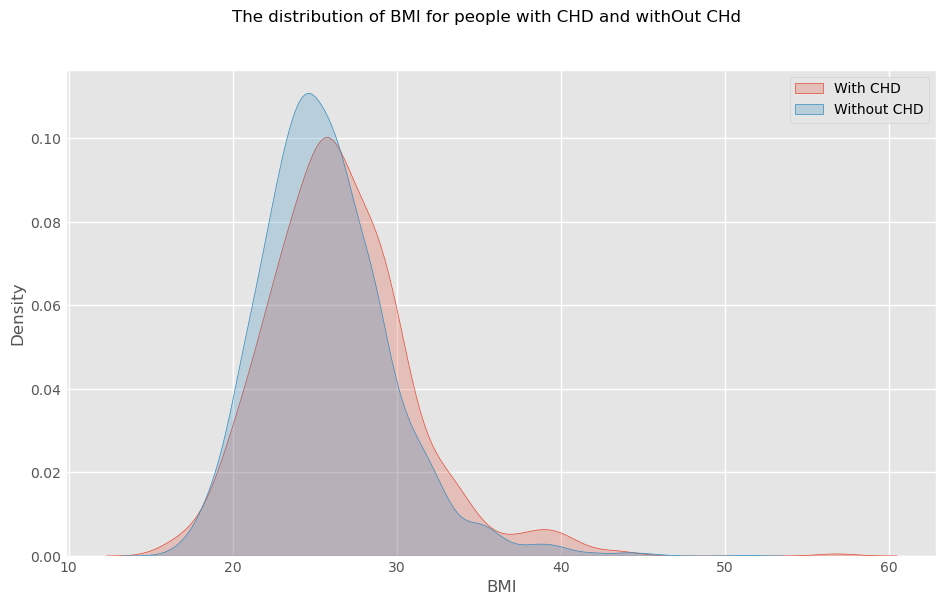

In [510]:
kde_with_target("BMI")

In [511]:
IQR_bands("BMI")

(35.47375000000001, 15.643749999999994)

In [512]:
data.columns

Index(['gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'target'],
      dtype='object')

### heartRate

In [513]:
col_details("heartRate")

####### heartRate and its type float64 ########

Number of unique Values 73
There are 1 Null Values

Some Random Data 
 641    63.0
642    95.0
643    56.0
644    73.0
645    75.0
Name: heartRate, dtype: float64

Top 5 Values Float64Index([75.0, 80.0, 70.0, 60.0, 85.0], dtype='float64')
Max value is 143.0 Min 44.0


In [85]:
data.loc[data.heartRate.isnull(),'heartRate'] = data.heartRate.median()

In [86]:
len(data.loc[data.heartRate.isnull(),'heartRate'])

0

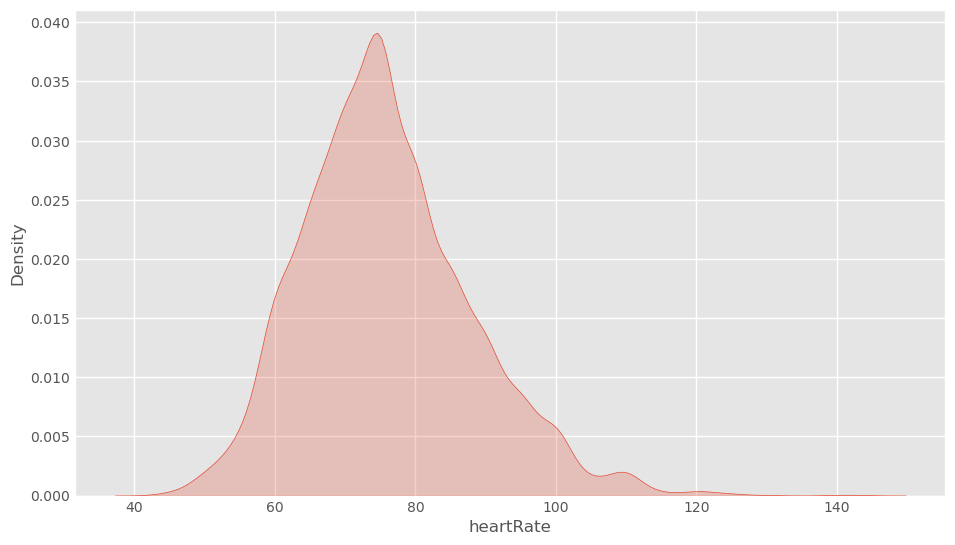

In [516]:
kde_plot("heartRate")

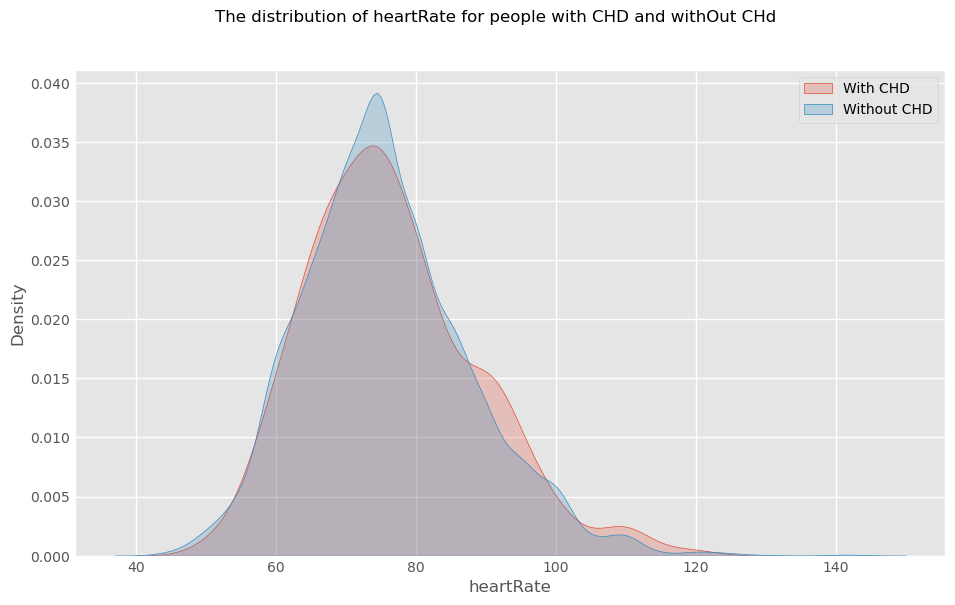

In [517]:
kde_with_target("heartRate")

### this graph show that people with Chd have higher hearRate than normal people

In [518]:
IQR_bands("heartRate")

(105.5, 45.5)

In [519]:
print("the mean of heartRate of people with chd is ",data[data[target] == 1]['heartRate'].mean())

the mean of heartRate of people with chd is  76.527950310559


In [520]:
print("the mean of heartRate of people without chd is ",data[data[target] == 0]['heartRate'].mean())

the mean of heartRate of people without chd is  75.7623817473567


### glucose

In [521]:
col_details("glucose")

####### glucose and its type float64 ########

Number of unique Values 143
There are 388 Null Values

Some Random Data 
 789    66.0
790    75.0
791    70.0
792    87.0
793    73.0
Name: glucose, dtype: float64

Top 5 Values Float64Index([75.0, 77.0, 73.0, 80.0, 70.0], dtype='float64')
Max value is 394.0 Min 40.0


In [43]:
len(data.loc[data.glucose.isnull(),'glucose']) / len(data)

0.09155261915998113

In [88]:
len(data.loc[data.glucose.isnull(),'glucose'])

0

In [90]:
data.loc[data.glucose.isnull(),'glucose'] = data.glucose.median()

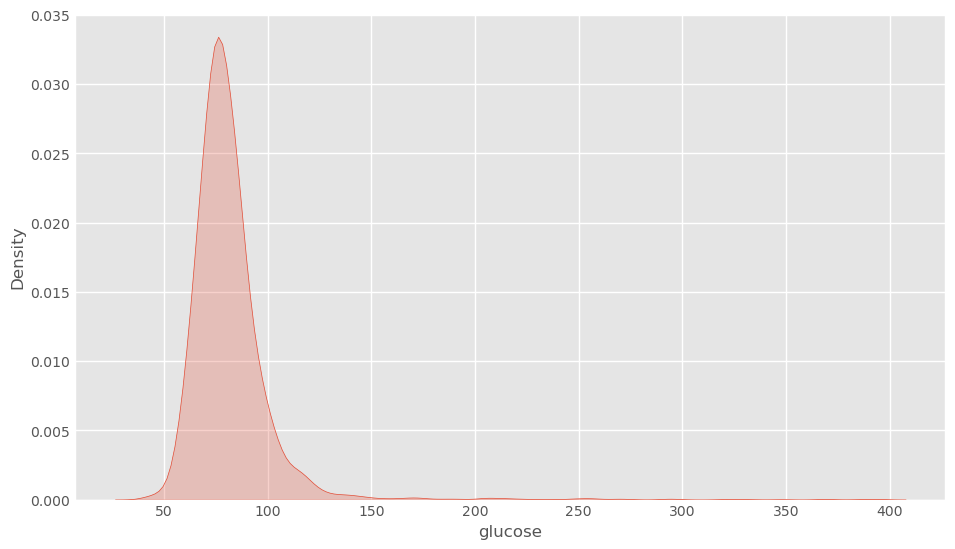

In [523]:
kde_plot("glucose")

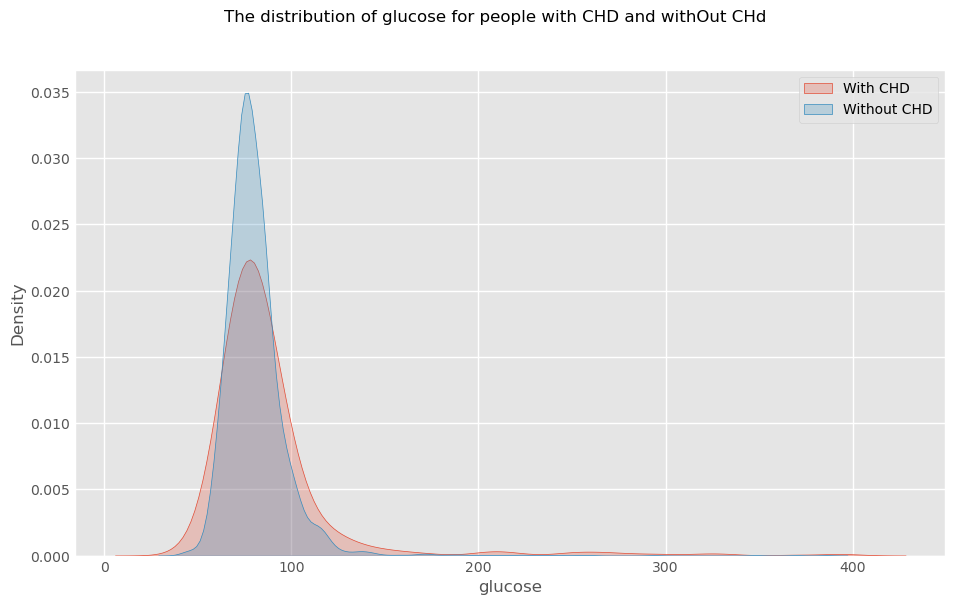

In [524]:
kde_with_target("glucose")

In [44]:
print("the mean of glucose of people with chd is ",data[data[target] == 1]['glucose'].mean())

the mean of glucose of people with chd is  89.00841750841751


In [45]:
print("the mean of glucose of people without chd is ",data[data[target] == 0]['glucose'].mean())

the mean of glucose of people without chd is  80.6821253071253


In [527]:
IQR_bands("glucose")

(111.0, 47.0)

### Target

In [528]:
col_details(target)

####### target and its type int64 ########

Number of unique Values 2
There are 0 Null Values

Some Random Data 
 1674    1
1675    1
1676    0
1677    0
1678    1
Name: target, dtype: int64

Top 5 Values Int64Index([0, 1], dtype='int64')
Max value is 1 Min 0


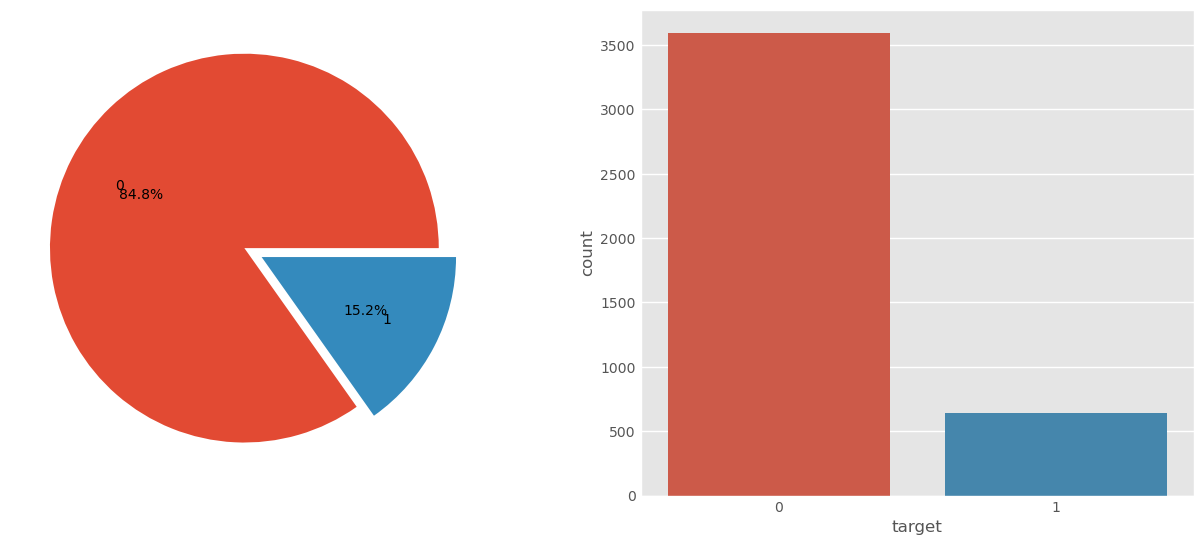

In [529]:
pie_plot_count(target)

In [116]:
data.isnull().sum()

gender              0
age                 0
education           0
currentSmoker       0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            50
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
target              0
dtype: int64

## total cholestrol


In [74]:
data.columns

Index(['gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'target'],
      dtype='object')

In [117]:
len(data.loc[data.totChol.isnull(),'totChol'])

50

In [126]:
data['totChol'].fillna(data['totChol'].median(), inplace=True)

SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (1104946137.py, line 1)

In [83]:
data.totChol.median()

234.0

1 - UnderSampling
2 - OverSampling
3 - Smote


---------
2 - Encoding > OneHotEndoer , LabelEncoder


3 - Normalization

In [133]:
data.to_csv("Data/Cleaned_data.csv")

In [134]:
df2 = pd.read_csv("Data/cleaned_data.csv")
df2.head()
df2.to_csv("Data/Cleaned_data.csv") #data saved in Cleaned_data is now cleaned

In [131]:
df2.isnull().sum()

Unnamed: 0         0
gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
target             0
dtype: int64